# <center>MSDS 7333 - Quantifying the World</center>
## <center>Case Study 6 - Clustering</center>


<center> <b> Hari Narayan Sanadhya, Asha Saxena, John Heinen</b> </center>
<center>September 13, 2018</center>
<br>

### Abstract
Natural language processing (NLP) is a major area of artificial intelligence research, which in its turn serves as a field of application and interaction of a number of other traditional AI areas. Until recently, the focus in AI applications in NLP was on knowledge representation, logical reasoning, and constraint satisfaction - first applied to semantics and later to the grammar. In the last decade, a dramatic shift in the NLP research has led to the prevalence of very large scale applications of statistical methods, such as machine learning and data mining. Naturally, this also opened the way to the learning and optimization methods that constitute the core of modern AI, most notably genetic algorithms and neural networks (A. Gelbukh). In this case study we analyze the term frequency per documents, applying the inverse document frequency to minimize commonly used terms and focus on the most important terms within the documents. The resultant term is termed as Term Frequency Inverse Document Frequency (TFIDF). We then apply clustering on the TFIDF data to generate some logical grouping of the documents to determine subjects based on the text.

### Introduction
Term Frequency – Inverse Document Frequency, or TFIDF, is a numerical statistics that helps in the identification of the most important words in documents within a collection.  After determining a count of each term used in a document, the inverse document frequency factor is then applied to that count which minimizes the value of words most commonly used within a collection of documents and provides value to those words that may be used often, but not an extraordinary amount of times no matter the document in the collection.  We will discuss how we use this statistic in further detail in the Methods section of the case study, practically applying it in the Results section.
 
Clustering is the method of identifying and separating similar groups of data within a larger data set.  This is done by the traits of the data, in this case study the words, and separating those collections of documents into their own cluster.  Clustering is very subjective in nature and there are many models that can be used to determine the clusters of documents.  The two types of models we will focus on in this case study are K Means clustering and DBSCAN.  In short, K Means clustering is an iterative algorithm that tries to find the closest observations to a number of predefined clusters in each iteration.  Density-based spatial clustering of applications with noise, or DBSCAN) is a density based algorithm that groups nearby observations by a predefined distance and considers observations outside of those ranges as noise or outliers.
 
In the remainder of this case study, we will go into more detail about the methods used for implementing the TFIDF statistic and the best approach for transforming the data for clustering.  We will then go into the results of the questions posed in the case study and provide a conclusion of our analysis.

<center>$\lim_{x\to 0}{\frac{e^x-1}{2x}}
 \overset{\left[\frac{0}{0}\right]}{\underset{\mathrm{H}}{=}}
 \lim_{x\to 0}{\frac{e^x}{2}}={\frac{1}{2}}$     (1) </center>

$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

### Methods

* Text Mining Terminology:-
    * Term Frequency (tf):- gives us the frequency of the word in each document in the corpus. It is the ratio of number of times the word appears in a document compared to the total number of words in that document. It increases as the number of occurrences of that word within the document increases. Each document has its own tf.<br><br><center>$tf{=}{\frac{\mbox{Number of times term t appears in a document}}{\mbox{Total number of terms in the document}}}$ (1) </center><br>
    * Inverse Document Frequency (idf):- used to calculate the weight of rare words across all documents in the corpus. The words that occur rarely in the corpus have a high IDF score. It is given by the equation below.<br><br><center>$idf{=}{\frac{\mbox{Total number of documents}}{\mbox{Number of documents with term t in it}}}$ (2) </center><br>
    * Term Frequency Inverse Document Frequency (tfidf):- is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.<br><br><center>$tfidf{=}{tf}{*}{idf}$ (3) </center>

* Scaling Methods:-
    * Log Scaling- replace all values with the log<sub>e</sub> component.<br><br>
    * Standard Scaling- centers column of the metrix to mean zero and/or scales it to unit variance.<br><br>
    * MinMax Scaling - Transforms features by scaling each feature to a range [0,1].<br>
    <center>$x_{i_{scaled}}{=}{\frac{x_{i}{-}{x_{min}}}{x_{max}{-}{x_{min}}}}$ (4) </center><br><br>
    * MaxAbs Scaling - Scale each feature by its maximum absolute value. Range of resultant matrix is [-1, 1]
    <center>$x_{i_{scaled}}{=}{\frac{x_{i}}{|x|_{max}}}$ (5) </center><br>
* Clustering Functions
    * Kmeans: - K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.
    * DBScan:- (Density-based spatial clustering of applications with noise) Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

### Results

#### Assigmnent Questions
1. Create a TF IDF matrix from the dataset.  Some steps make take several minutes to process in R.<br>
[Solution Click Here](#Solution_question_1)<br><br>

2. Do a K-means clustering for 5,10,20 clusters.  What do you observe about the information R returns you?  What do each of the parameters represent when you run the kmeans() function.<br>
[Solution Click Here](#Solution_question_2)<br><br>

3. Run a DBScan on the data.  How are the results different from your kmeans?  What is the eps?  ( hint: help(dbscan) )  What is the meaning of cluster 0?<br>
[Solution Click Here](#Solution_question_3)<br><br>

4.  These papers are for a conference submission.  When would you use kmeans vs. DBScan in this instance.  <br>
[Solution Click Here](#Solution_question_4)<br><br>

5.  Using a cluster size of 10 and kmeans, create a word cloud of the different clusters most popular words.  Are you able to determine a difference among the papers in different clusters? <br>
[Solution Click Here](#Solution_question_5)

In [1]:
library("dplyr")

data_path <- '/media/hkns/Acer/Link to SMU/MSDS 7333 - Quantifying the World/Live Class/Unit 1/CaseStudy6'
# Set the working directory to the folder where the dataset is.
setwd(data_path)

# View the content of the working directory
print(system('ls -l', , intern=TRUE))


[1] "total 10540"                                                  
[2] "-rwxrwxrwx 1 hkns hkns   11754 Aug 29 21:47 Case Study 6.docx"
[3] "-rwxrwxrwx 1 hkns hkns 8509211 Feb 29  2008 docword.nips.txt" 
[4] "-rwxrwxrwx 1 hkns hkns 2165446 Sep 12 11:48 tfidf.rds"        
[5] "-rwxrwxrwx 1 hkns hkns  100807 Aug 29 20:43 vocab.nips.txt"   


In [2]:
# Read the docword.nips.txt file and get the data into a dataframe

#   The txt file has not header and actual data is from row 4 so skipped first 3 rows
df_word_data <- read.csv(file='docword.nips.txt', sep=' ', header=FALSE, 
                         col.names = c('doc', 'word_num', 'count'), skip=3)

# Take a look at the dataset to see if the import was successful
head(df_word_data, 5)

doc,word_num,count
1,2,1
1,39,1
1,42,3
1,77,1
1,95,1


In [3]:
# Print the dimensions of the dataset
dim(df_word_data)

[1] 746316      3

In [4]:
# Print the statistical summary of the dataset
summary(df_word_data)

      doc            word_num         count        
 Min.   :   1.0   Min.   :    1   Min.   :  1.000  
 1st Qu.: 381.0   1st Qu.: 2923   1st Qu.:  1.000  
 Median : 760.0   Median : 6140   Median :  1.000  
 Mean   : 757.7   Mean   : 6131   Mean   :  2.589  
 3rd Qu.:1133.0   3rd Qu.: 9228   3rd Qu.:  2.000  
 Max.   :1500.0   Max.   :12419   Max.   :132.000  

In [5]:
# Read the vocab.nips.txt file and get the data into a dataframe
df_vocab_data <- read.csv('vocab.nips.txt', header=FALSE, col.names = c('word'))

# Take a look at the dataset to see if the import was successful
head(df_vocab_data, 5)

word
a2i
aaa
aaai
aapo
aat


In [6]:
# Since the dataset only contains the word and the word number is implicitly referred as the row number of the word,
#     add column specifically to associate word with word number
df_vocab_data <- df_vocab_data %>% mutate(word_num = row_number())

# Take another look at the dataset to see if the insertion was successful
head(df_vocab_data, 5)

word,word_num
a2i,1
aaa,2
aaai,3
aapo,4
aat,5


In [7]:
# Print the dimensions of the vocab dataset
dim(df_vocab_data)

[1] 12419     2

In [8]:
# Number of docs is number of unique doc values in the data docword.nips.txt file
nbr_of_docs <- length(unique(df_word_data$doc)) 

# Number of distinct words is the number of rows in the vocab.nips.txt file
nbr_of_words <- dim(df_vocab_data)[1]

In [9]:
# To generate the tfidf dataset, we used pivot table concept wherein we transformed the word_num from a column to 
#   the dataframe columns and the word count as the corresponding value in it.
# This saves us from creating the dataframe and add columns in it using for loop and then insert data into it.
#   The biggest advantage is no need to check the table columns with no data at all as it wont be created.

library(reshape)
df_tfidf <- cast(df_word_data, doc ~ word_num)

Using count as value column.  Use the value argument to cast to override this choice


In [10]:
dim(df_tfidf)

[1]  1500 12376

In [11]:
head(df_tfidf[, 1:20])

doc,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,3,NA,1,NA
3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA
4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,5,NA,1,NA
5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,2,NA
6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [12]:
# Replace all NA values by 0, as all these columns represent the word count and NA value will be assigned when 
#   the word does not exist in the document.

library(dplyr)
df_tfidf <- df_tfidf %>% replace(is.na(.), 0)
# This data contains just the term frequency for each word in the document.
head(df_tfidf[, 1:20])

doc,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
dim(df_tfidf)

[1]  1500 12376

In [15]:
# Calculation of inverse document frequency, Compute document frequency first 
idf <- colSums(df_tfidf[-1] != 0)
# and then take the inverse of the document frequency to obtain the inverse document frequency.
idf<- 1 / idf

# View some idf values
idf[1]
idf[2]
idf[39]

1 
0.2

2 
0.07142857

39 
0.0006872852

In [16]:
length(idf) # Lists the number of words in IDF

dim(df_vocab_data)[1] # Lists the number of words present in the documents provided in the dataset

# Irrespective of whether number of words in IDF equals number of words in the dataset, 
#   the words that can be analyzed are the words that were present in the documents provided in the document
new_words <- length(idf)

[1] 12375

[1] 12419

In [17]:
# Compute tfidf as product of term_frequency with inverse document frequency
for (i in 1:new_words){
    df_tfidf[,i+1] <- df_tfidf[,i+1] * idf[i]
}

### Solution question 1: tfidf matrix(dataframe) created <a id='Solution_question_1'></a>

In [18]:
# View the first few records (20 columns only) of the df_tfidf dataframe created
head(df_tfidf[,1:20])

doc,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,0,0.07142857,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000000,0,0.000000000,0
2,0,0.00000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0.007246377,0,0.001661130,0
3,0,0.00000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000000,0,0.001661130,0
4,0,0.00000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0.012077295,0,0.001661130,0
5,0,0.00000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0.002415459,0,0.003322259,0
6,0,0.00000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000000,0,0.000000000,0


In [19]:
# df_tfidf[-1] is used whenever we dont need the doc column and require just the tfidf information 

# Row Index of maximum tfidf value 
max_row_index <- which.max(apply(df_tfidf[-1], MARGIN=1, max))

# Column Index of maximum tfidf value 
max_col_index <- which.max(apply(df_tfidf[-1], MARGIN=2, max))

# Row Index of Minimum tfidf value 
min_row_index <- which.min(apply(df_tfidf[-1], MARGIN=1, min))

# Row Index of Minimum tfidf value 
min_col_index <- which.min(apply(df_tfidf[-1], MARGIN=2, min))

# Print the location and value of minimum and maximum tfidf
cat("Row and Column index of maximum TFIDF value: ", max_row_index, max_col_index, '\n')
cat("Maximum tfidf value:", df_tfidf[-1][max_row_index, max_col_index], '\n')
cat("Row and Column index of minimum TFIDF value: ", min_row_index, min_col_index, '\n')
cat("Minimum tfidf value:", df_tfidf[-1][min_row_index, min_col_index], '\n')

Row and Column index of maximum TFIDF value:  1484 2869 
Maximum tfidf value: 4.488636 
Row and Column index of minimum TFIDF value:  1 1 
Minimum tfidf value: 0 


In [20]:
# For each feature i.e. tfidf values of every word, get the maximum value
max_tfidf_value_for_each_word <- apply(df_tfidf[-1], MARGIN=2, max)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00158  0.10345  0.27778  1.31336  0.83333 88.00000 

Number of columns with max TFIDF value greater then one: 2579

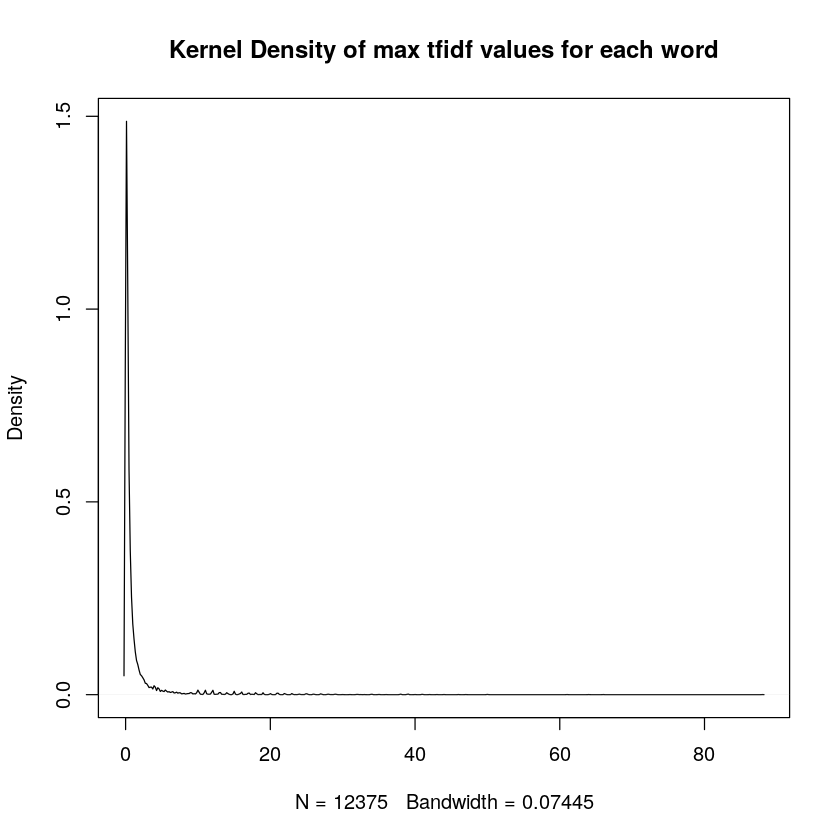

In [21]:
# Print the summary of the maximum value of each feature (max tfidf value for every word)
summary(max_tfidf_value_for_each_word)

cat("Number of columns with max TFIDF value greater then one:", sum(max_tfidf_value_for_each_word>1))

# Plot the distribution of the maximum value of each feature
d <- density(max_tfidf_value_for_each_word)
plot(d, main="Kernel Density of max tfidf values for each word")

From the above output of summary statement and the density plot, its clear that most of the words have maximum value of tfidf less then one (Q3 = 0.83333) but the maximum value of tfidf is 88. Only 2579 columns having maximum value of tfidf greater then 1. So to scale the tfidf data may be required.

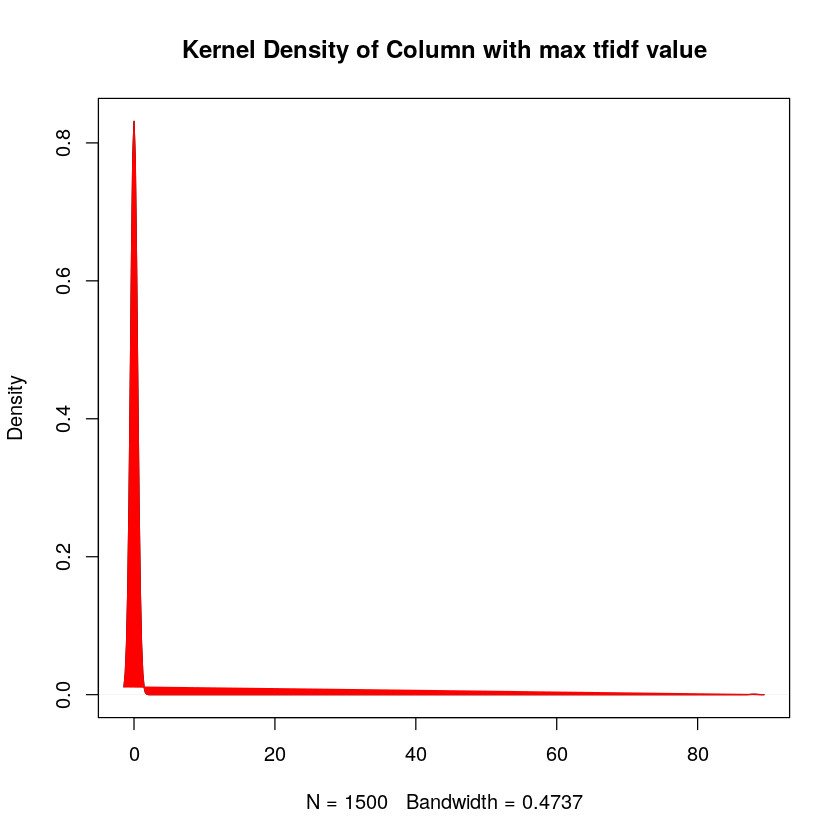

In [22]:
# Before scaling the data, lets plot the distribution of the tfidf values of the word containing the max value.
d <- density(df_tfidf[-1][, max_col_index])
plot(d, main="Kernel Density of Column with max tfidf value")
polygon(d, col="red", border="red")

Above figure shows that though the maximum tfidf value for this word is 88, there are very few tfidf value for this word which is greater then 2.

In [23]:
# Save the data as an R dataset file (RDS) before scaling so as to reload it later again if required
saveRDS(df_tfidf, file = "tfidf.rds")

In [23]:
# Function to perform Min-max scaling of the feature passed as input -  output will be values between 0 and 1
# Reference - pythons scikitlearn library documentation - sklearn.preprocessing.MinMaxScaler
min_max_scaled <- function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

In [24]:
# Function to perform Max Abs scaling of the feature passed as input - output will be values between -1 to 1
# Reference - pythons scikitlearn library documentation - sklearn.preprocessing.MaxAbsScaler
max_abs_scaled <- function(x) {
    return ((x / max(abs(x))))
}

### Solution question 2: Perform kmeans clustering <a id='Solution_question_2'></a>

In [25]:
# Retrieve 2 principle components, this we will use to plot the cluster data
mds <- cmdscale(dist(df_tfidf[-1]), k=2)

# Print the summary of the first two principle components
summary(mds)

       V1                 V2           
 Min.   :-0.18228   Min.   :-74.46040  
 1st Qu.:-0.06052   1st Qu.:  0.04870  
 Median :-0.05996   Median :  0.04890  
 Mean   : 0.00000   Mean   :  0.00000  
 3rd Qu.:-0.05980   3rd Qu.:  0.04956  
 Max.   :90.97787   Max.   :  0.18867  

The above output shows that the first two principle components have skewed data. <br>First one has minimum value as -0.18228, Q3 (75 precentile) value as -0.05980 and maximum value as 90.97787 <br>Second one has minimum value as -74.46040, Q1 (25 precentile) value as 0.04870 and maximum value as 0.18867. <br>Since our dataset is not scaled, outlied values of the features are impacting the PCA as well.

In [26]:
# Run kmeans with 5 clusters on the original dataset
library(cluster)
cl <- kmeans(df_tfidf[-1], 5)
str(cl)

List of 9
 $ cluster     : Named int [1:1500] 3 3 3 3 3 3 3 3 3 3 ...
  ..- attr(*, "names")= chr [1:1500] "1" "2" "3" "4" ...
 $ centers     : num [1:5, 1:12375] 0 0 0.00107 0 0 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : chr [1:12375] "1" "2" "3" "4" ...
 $ totss       : num 204440
 $ withinss    : num [1:5] 0 0 182744 0 0
 $ tot.withinss: num 182744
 $ betweenss   : num 21695
 $ size        : int [1:5] 1 1 1496 1 1
 $ iter        : int 4
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


### Answer to the part 
**"What do you observe about the information R returns you?  What do each of the parameters represent when you run the kmeans() function." of question 2**

When inspecting the information that R returns when looking at the K-means results we find the following (per R documentation)<br>

<table width="624" cellspacing="0" cellpadding="1">
<tbody>
<tr valign="top">
<td width="80">
<p><span style="font-size: medium;"><strong>cluster</strong></span></p>
</td>
<td width="540">
<p><span style="font-size: medium;">A vector of integers (from&nbsp;1:k) indicating the cluster to which each point is allocated.</span></p>
</td>
</tr>
<tr valign="top">
<td width="80">
<p><span style="font-size: medium;"><strong>centers</strong></span></p>
</td>
<td width="540">
<p><span style="font-size: medium;">A matrix of cluster centres.</span></p>
</td>
</tr>
<tr valign="top">
<td width="80">
<p><span style="font-size: medium;">totss</span></p>
</td>
<td width="540">
<p><span style="font-size: medium;">The total sum of squares.</span></p>
</td>
</tr>
<tr valign="top">
<td width="80">
<p><span style="font-size: medium;">withinss</span></p>
</td>
<td width="540">
<p><span style="font-size: medium;">Vector of within-cluster sum of squares, one component per cluster.</span></p>
</td>
</tr>
<tr valign="top">
<td width="80">
<p><span style="font-size: medium;">tot.withinss</span></p>
</td>
<td width="540">
<p><span style="font-size: medium;">Total within-cluster sum of squares, i.e.&nbsp;sum(withinss).</span></p>
</td>
</tr>
<tr valign="top">
<td width="80">
<p><span style="font-size: medium;">betweenss</span></p>
</td>
<td width="540">
<p><span style="font-size: medium;">The between-cluster sum of squares, i.e.&nbsp;totss-tot.withinss.</span></p>
</td>
</tr>
<tr valign="top">
<td width="80">
<p><span style="font-size: medium;"><strong>size</strong></span></p>
</td>
<td width="540">
<p><span style="font-size: medium;">The number of points in each cluster.</span></p>
</td>
</tr>
<tr valign="top">
<td width="80">
<p><span style="font-size: medium;">iter</span></p>
</td>
<td width="540">
<p><span style="font-size: medium;">The number of (outer) iterations.</span></p>
</td>
</tr>
<tr valign="top">
<td width="80">
<p><span style="font-size: medium;">ifault</span></p>
</td>
<td width="540">
<p><span style="font-size: medium;">integer: indicator of a possible algorithm problem &ndash; for experts.</span></p>
</td>
</tr>

Of the above listed parameters retrieved from the kmeans method, we ended up using only 3 parameters :- **<u>size** to print the number of elements in each cluster and **<u>cluster** and **<u>centers** parameters while creating the plot to visualize the cluster information.

The parameters or arguments that can be used when running the kmeans() function are as follows (per R documentation):
<table style="width: 609px;" cellspacing="1" cellpadding="1">
<tbody>
<tr valign="top">
<td style="width: 81px;" bgcolor="#dddddd">
<p>Parameter</p>
</td>
<td style="width: 298px;" bgcolor="#dddddd">
<p>Description</p>
</td>
<td style="width: 229px;" bgcolor="#dddddd">
<p>Default Value</p>
</td>
</tr>
<tr valign="top">
<td style="width: 81px;">
<p><span style="font-size: medium;">x</span></p>
</td>
<td style="width: 298px;">
<p><span style="font-size: medium;">numeric matrix of data, or an object that can be coerced to such a matrix (such as a numeric vector or a data frame with all numeric columns).</span></p>
</td>
<td style="width: 229px;">
<p>* No default, required parameter</p>
</td>
</tr>
<tr valign="top">
<td style="width: 81px;">
<p><span style="font-size: medium;">centers</span></p>
</td>
<td style="width: 298px;">
<p><span style="font-size: medium;">either the number of clusters, say </span><span style="font-size: medium;"><em>k</em></span><span style="font-size: medium;">, or a set of initial (distinct) cluster centres. If a number, a random set of (distinct) rows in x is chosen as the initial centres.</span></p>
</td>
<td style="width: 229px;">
<p>* No default, required parameter</p>
</td>
</tr>
<tr valign="top">
<td style="width: 81px;">
<p><span style="font-size: medium;">iter.max</span></p>
</td>
<td style="width: 298px;">
<p><span style="font-size: medium;">the maximum number of iterations allowed.</span></p>
</td>
<td style="width: 229px;">
<p>10</p>
</td>
</tr>
<tr valign="top">
<td style="width: 81px;">
<p><span style="font-size: medium;">nstart</span></p>
</td>
<td style="width: 298px;">
<p><span style="font-size: medium;">if centers is a number, how many random sets should be chosen?</span><span style="font-size: medium;">Possible values - c("Hartigan-Wong", "Lloyd", "Forgy", "MacQueen")</span></p>
<p><span style="font-size: medium;">Note that "Lloyd" and "Forgy" are alternative names for one algorithm.</span></p>
</td>
<td style="width: 229px;">
<p>1</p>
</td>
</tr>
<tr valign="top">
<td style="width: 81px;">
<p><span style="font-size: medium;">algorithm</span></p>
</td>
<td style="width: 298px;">
<p><span style="color: #000000;"><span  ><span style="font-size: medium;">Possible values - c("Hartigan-Wong", "Lloyd", "Forgy", "MacQueen"). </span></span></span></p>
</td>
<td style="width: 229px;">
<p><span style="color: #000000;"><span  ><span style="font-size: medium;">"Hartigan-Wong"</span></span></span></p>
</td>
</tr>
<tr valign="top">
<td style="width: 81px;">
<p><span style="font-size: medium;">method</span></p>
</td>
<td style="width: 298px;">
<p><span style="font-size: medium;">Possible Values </span><span style="color: #000000;"><span  ><span style="font-size: medium;">c("centers", "classes")</span></span></span><span style="font-size: medium;">. "centers" causes fitted to return cluster centers (one for each input point) and"classes" causes fitted to return a vector of class assignments.</span></p>
</td>
<td style="width: 229px;">
<p><span style="color: #000000;"><span  ><span style="font-size: medium;">"centers"</span></span></span></p>
</td>
</tr>
<tr valign="top">
<td style="width: 81px;">
<p><span style="font-size: medium;">trace</span></p>
</td>
<td style="width: 298px;">
<p><span style="font-size: medium;">logical or integer number, currently only used in the default method ("Hartigan-Wong"): if positive (or true), tracing information on the progress of the algorithm is produced. Higher values may produce more tracing information.</span></p>
</td>
<td style="width: 229px;">
<p>FALSE</p>
</td>
</tr>
</tbody>
</table>
<p> </p>

In our code, we just passed values for the required parameters (**<u>x** and **<u>centers**) and for others, we used the default values.

[1] 1496    1    1    1    1

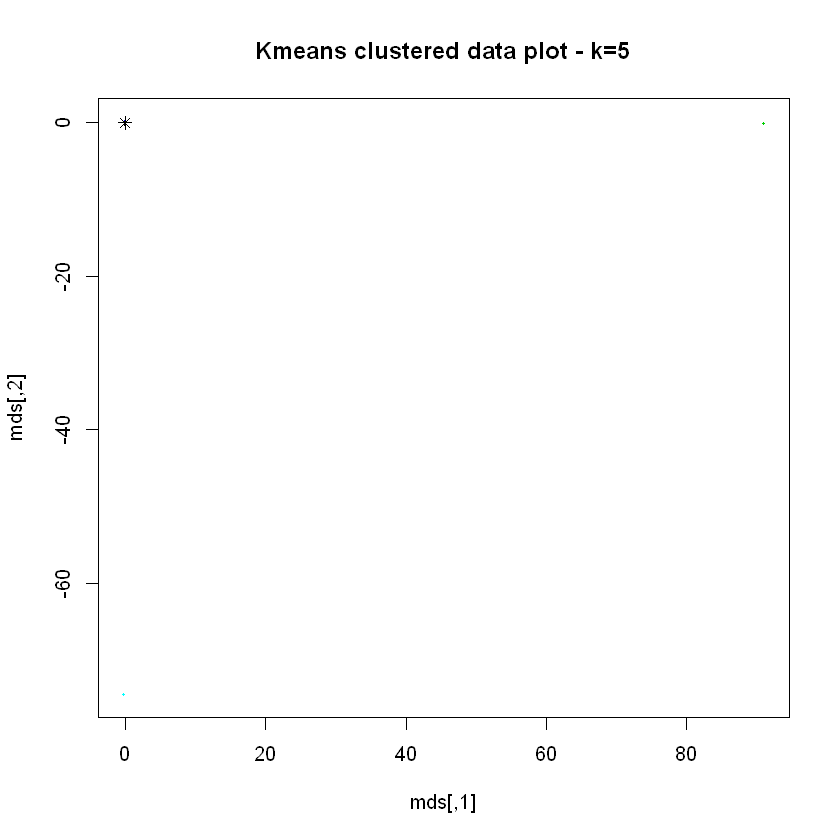

In [27]:
cl$size
plot(mds, col=cl$cluster, pch = 20, cex = 0.5, main="Kmeans clustered data plot - k=5")
points(cl$centers, col = cl$cluster, pch = 8, cex = 1)

Since we have used unscaled data, kmeans which uses distance as the deciding matrix to figure out the cluster of the data, the outlied values will have large distance and will therefore cause some of the clusters to be created with just the outlied values. 

To figure out the optimal number of clusters that this dataset (unscaled) can have, we used two approaches - 
* using average silhouette width (silhouette method)
* using total within sum of square (also called elbow mothod)

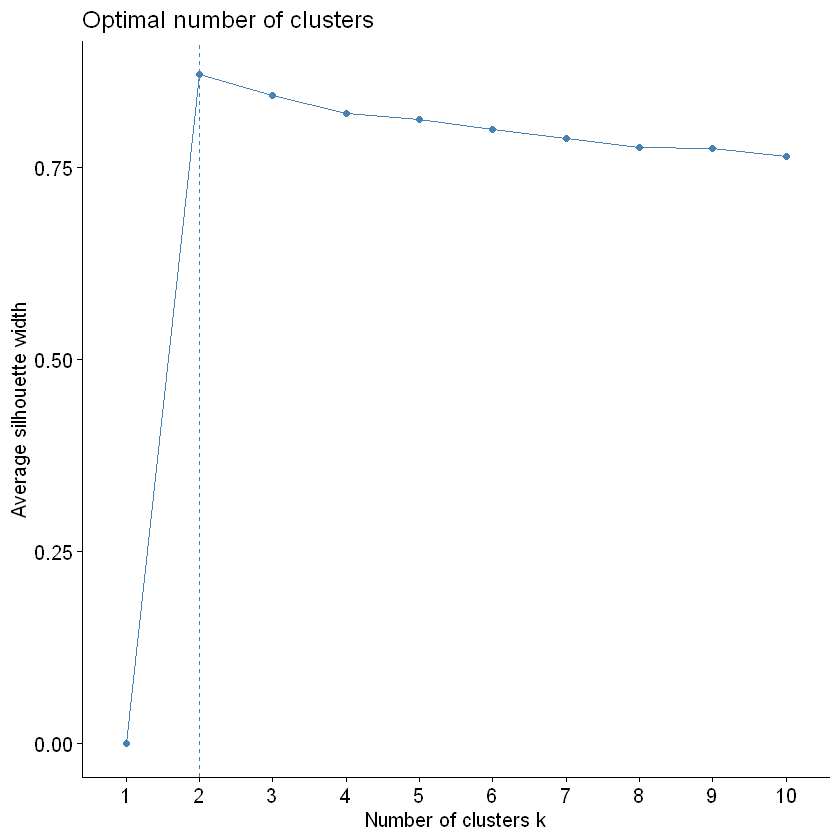

In [28]:
library(factoextra)
# silhouette method for kmeans
fviz_nbclust(df_tfidf[-1], FUNcluster= kmeans, method = "silhouette") 

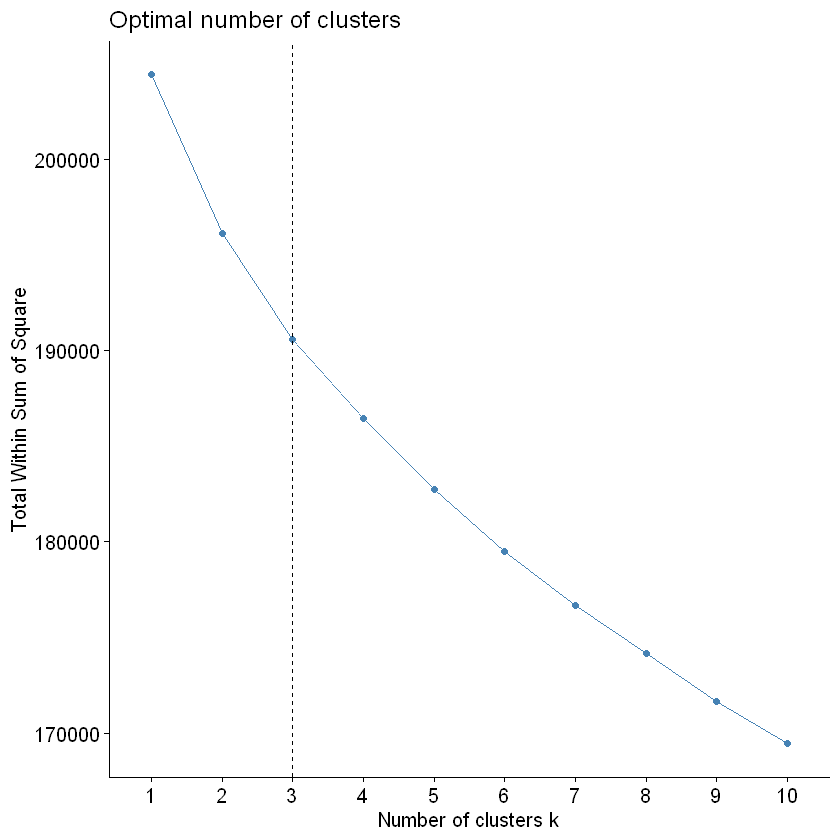

In [29]:
# Elbow method for kmeans
fviz_nbclust(df_tfidf[-1], kmeans, method = "wss") +
geom_vline(xintercept = 3, linetype = 2)

The above two graphs shows that the optimal number of clusters for the unscaled dataset is 2 (using silhouette method) and 3 (using elbow method). We didn't run the kmeans for 10 and 15 clusters for unscaled data as the results are impacted by the data being unscaled.

### **Log Scale Conversion**

In [30]:
# Restore the original tfidf dataset
df_tfidf <- readRDS(file = "tfidf.rds")

# Log scale data
df_tfidf[-1] <- as.data.frame(sapply(df_tfidf[-1], function(x) (log(x+1))))
dim(df_tfidf)

[1]  1500 12376

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001581 0.098440 0.245122 0.494013 0.606136 4.488636 

Number of columns with max TFIDF value greater then one: 1761

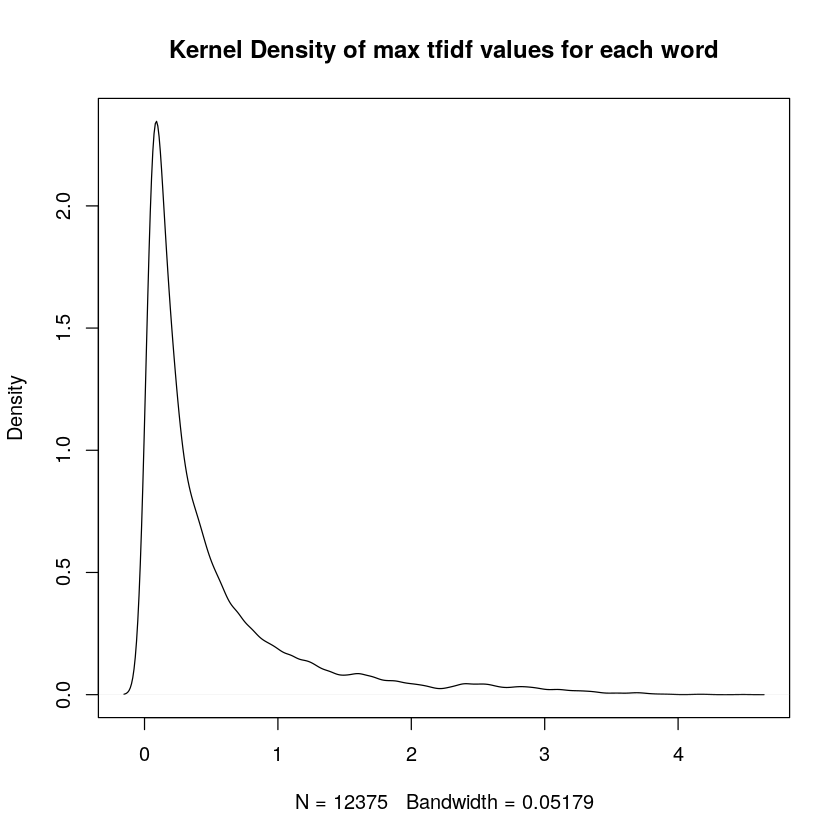

In [31]:
# After log scale conversion, plot the distribution of the max tfidf values for every feature
# For each feature i.e. tfidf values of every word, get the maximum value
max_tfidf_value_for_each_word <- apply(df_tfidf[-1], MARGIN=2, max)

# Print the summary of the maximum value of each feature (max tfidf value for every word)
summary(max_tfidf_value_for_each_word)

cat("Number of columns with max TFIDF value greater then one:", sum(max_tfidf_value_for_each_word>1))

# Plot the distribution of the maximum value of each feature
d <- density(max_tfidf_value_for_each_word)
plot(d, main="Kernel Density of max tfidf values for each word")

The above figure shows that though we have done logarithm scaling, most of the maximum values for every feature (tfidf value for each word) is still skewed with most of the values less them one (of 12375 features, 1761 have max values greater than one) with max value going up till almost 4.5.

In [32]:
# Retrieve 2 principle components
mds <- cmdscale(dist(df_tfidf[-1]), k=2)
summary(mds)

       V1                  V2           
 Min.   :-0.723200   Min.   :-2.683379  
 1st Qu.:-0.044615   1st Qu.: 0.002815  
 Median :-0.028827   Median : 0.014833  
 Mean   : 0.000000   Mean   : 0.000000  
 3rd Qu.: 0.009641   3rd Qu.: 0.021155  
 Max.   : 1.884878   Max.   : 0.085579  

[1] 1466   11    3   16    4

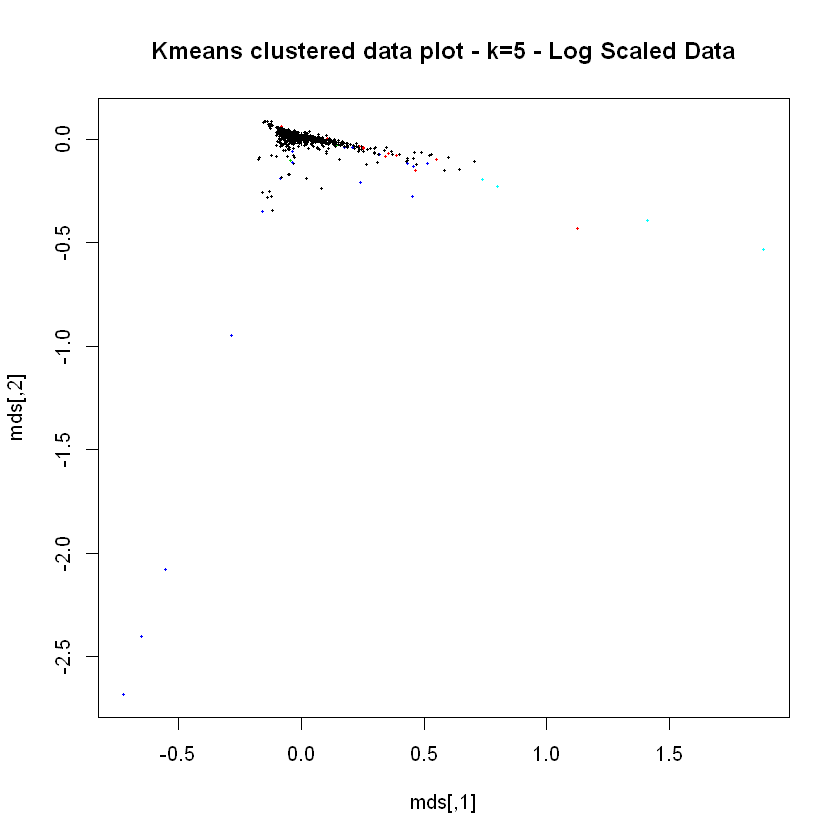

In [33]:
# Run kmeans with 5 clusters on the log scaled dataset
cl <- kmeans(df_tfidf[-1], 5)
cl$size
plot(mds, col=cl$cluster, pch = 20, cex = 0.5, main="Kmeans clustered data plot - k=5 - Log Scaled Data")
points(cl$centers, col = cl$cluster, pch = 8, cex = 1)

Though we have done log scaling fo the data, but still the distribution of maximum values of the feature set is highly skewed. kmeans which uses distance as the deciding matrix to figure out the cluster of the data, the outlied values will have large distance and will therefore cause some of the clusters to be created with just the outlied values. The resultant cluster size is 1466, 11, 3, 16 and 4 which is not a good solution as most of the data are in the first cluster.

To figure out the optimal number of clusters that this dataset (log scaled) can have, we used two approaches - 
* using average silhouette width (silhouette method)
* using total within sum of square (also called elbow mothod)

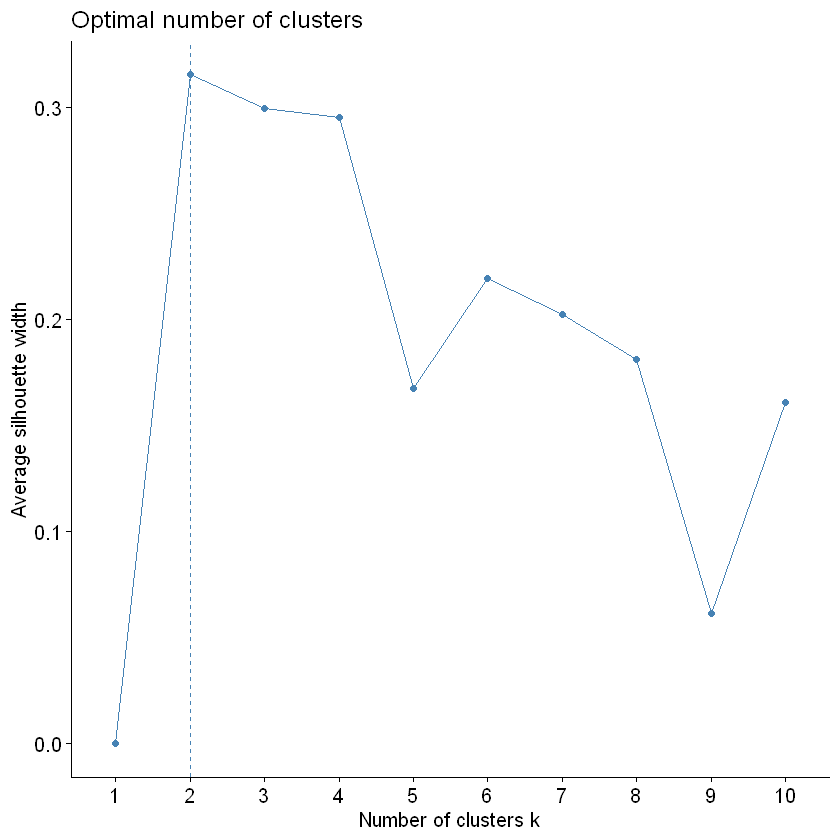

In [34]:
# silhouette method for kmeans
fviz_nbclust(df_tfidf[-1], FUNcluster= kmeans, method = "silhouette") 

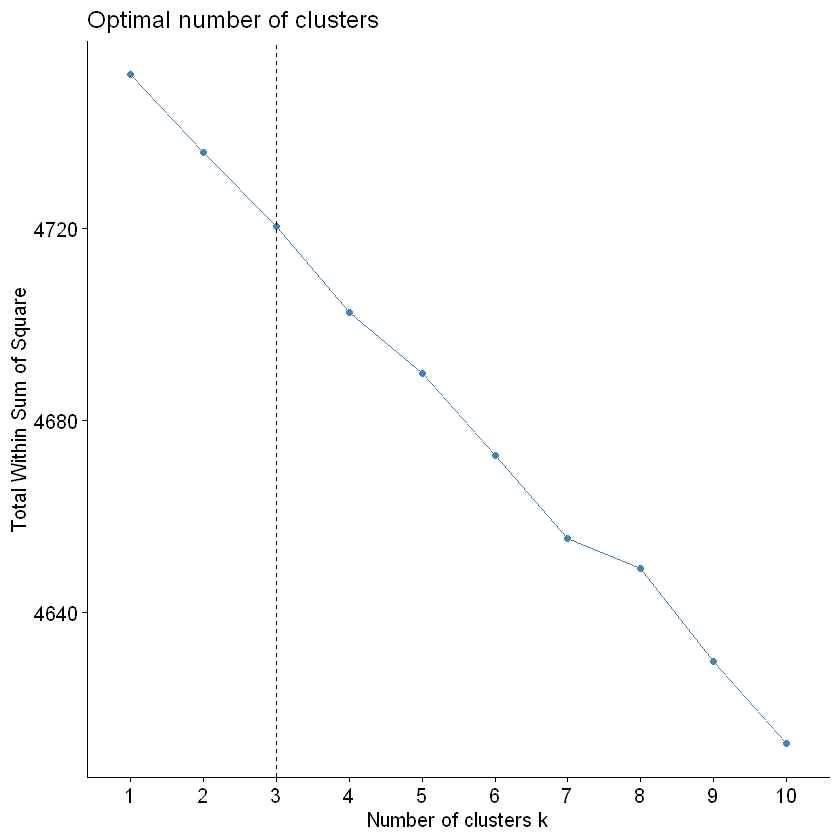

In [35]:
# Elbow method for kmeans
fviz_nbclust(df_tfidf[-1], kmeans, method = "wss") +
geom_vline(xintercept = 3, linetype = 2)

The above two graphs shows that the optimal number of clusters for the log scaled dataset is 2 (using silhouette method) and 3 (using elbow method). We didn't run the kmeans for 10 and 15 clusters for this data as the results are impacted by the data being not normalized properly causing outliers to impact the results of kmeans.

### **Standard Scaled Data**
Dataset is scaled in a way that for every feature, the mean is zero and standard deviation is one.

In [36]:
# Standardized data
# Restore the original tfidf dataset
df_tfidf <- readRDS(file = "tfidf.rds")

df_tfidf[-1] <- scale(df_tfidf[-1])
dim(df_tfidf)

[1]  1500 12376

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.172  15.606  22.341  23.122  30.360  38.704 

Number of columns with max TFIDF value greater then one: 12375

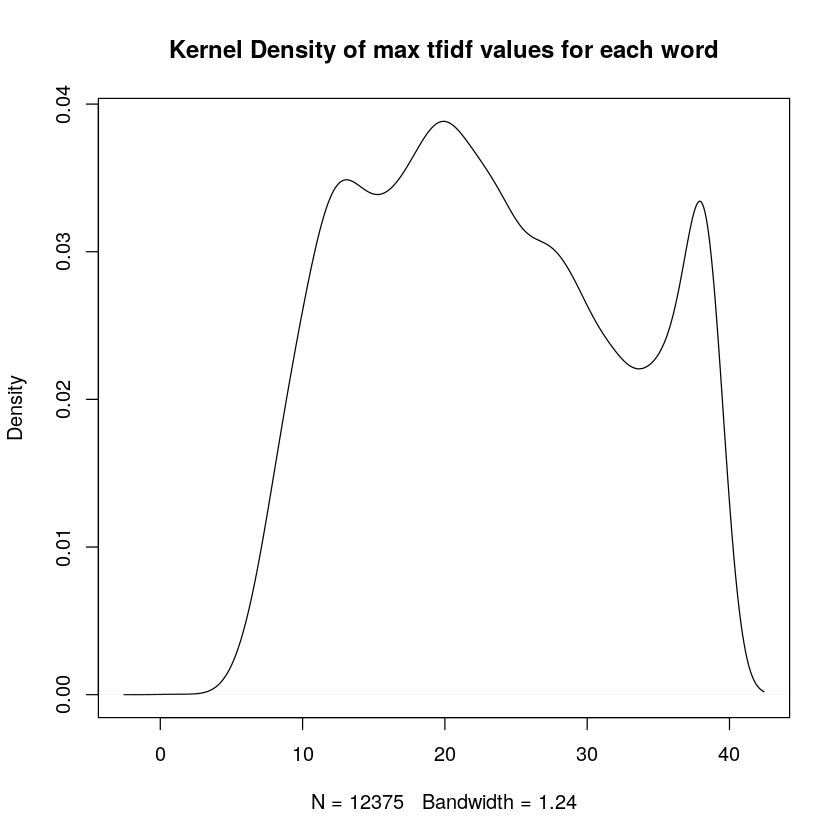

In [37]:
# After standard scale conversion, plot the distribution of the max tfidf values for every feature
# For each feature i.e. tfidf values of every word, get the maximum value
max_tfidf_value_for_each_word <- apply(df_tfidf[-1], MARGIN=2, max)

# Print the summary of the maximum value of each feature (max tfidf value for every word)
summary(max_tfidf_value_for_each_word)

cat("Number of columns with max TFIDF value greater then one:", sum(max_tfidf_value_for_each_word>1))

# Plot the distribution of the maximum value of each feature
d <- density(max_tfidf_value_for_each_word)
plot(d, main="Kernel Density of max tfidf values for each word")

The above figure shows that performing standard scaling of the dataset, maximum values for the features (tfidf value for each word) are sort of normally distributed (approx bell shaped curve). So, we think that the results for the kmeans clustering may look promising in this case.

In [38]:
# Retrieve 2 principle components
mds <- cmdscale(dist(df_tfidf[-1]), k=2)
summary(mds)

       V1                V2          
 Min.   :-15.263   Min.   :-15.3133  
 1st Qu.: -5.548   1st Qu.: -4.8524  
 Median : -2.078   Median : -0.4789  
 Mean   :  0.000   Mean   :  0.0000  
 3rd Qu.:  3.604   3rd Qu.:  3.9567  
 Max.   : 50.789   Max.   : 33.0919  

[1] 1096    2   23   32  347

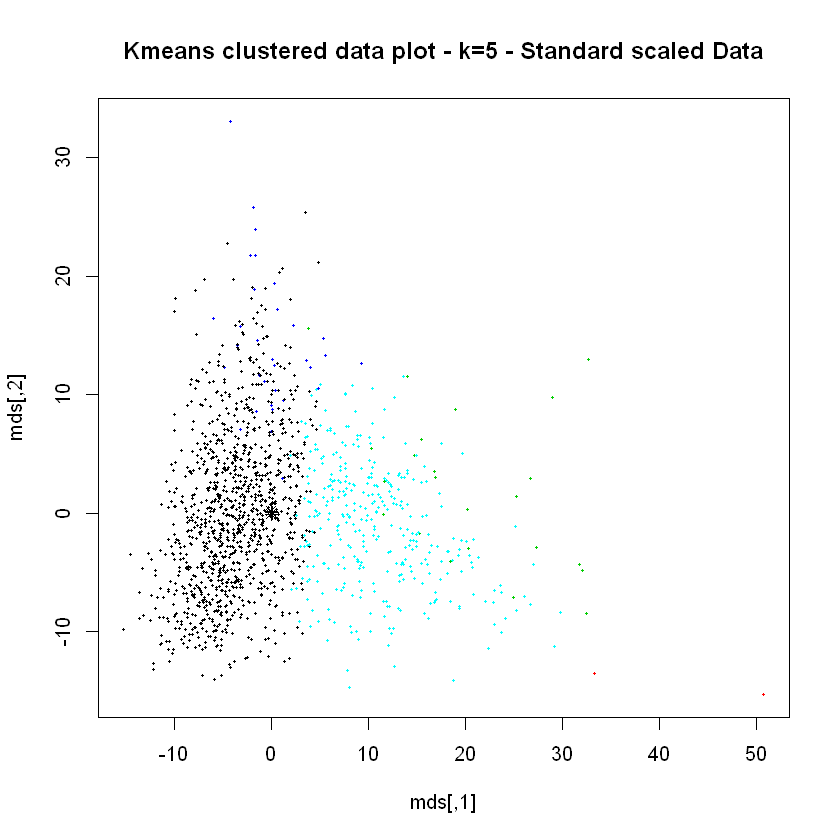

In [39]:
# Run kmeans with 5 clusters on the Standard scaled dataset
cl <- kmeans(df_tfidf[-1], 5)
cl$size
plot(mds, col=cl$cluster, pch = 20, cex = 0.5, main="Kmeans clustered data plot - k=5 - Standard scaled Data")
points(cl$centers, col = cl$cluster, pch = 8, cex = 1)

kmeans (k=5) cluster size for standard scaled data is 1096, 2, 23, 32 and 347. Here it appears that may be the outlied values formed the cluster 2, 3 and 4 and the other 2 clusters are formed using the data which are almost on the same scale. It appears that may be the optimal number of clusters for standard scaled data is 3. We will try to determine this later after performing the kmeans with 10 and 15 clusters.

[1]   5  33   2   1   1   1 291 357 793  16

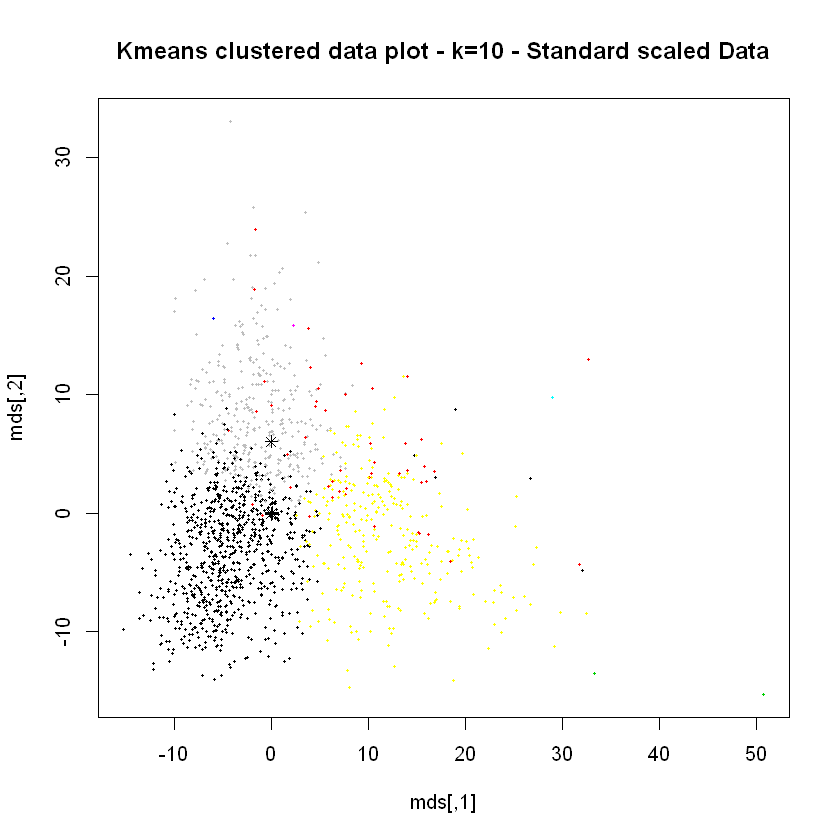

In [40]:
# Run kmeans with 10 clusters on the Standard scaled dataset
cl <- kmeans(df_tfidf[-1], 10)
cl$size
plot(mds, col=cl$cluster, pch = 20, cex = 0.5, main="Kmeans clustered data plot - k=10 - Standard scaled Data")
points(cl$centers, col = cl$cluster, pch = 8, cex = 1)

[1]   1   6  90  23  52 187  37   2   1 537  98 442   1  11  12

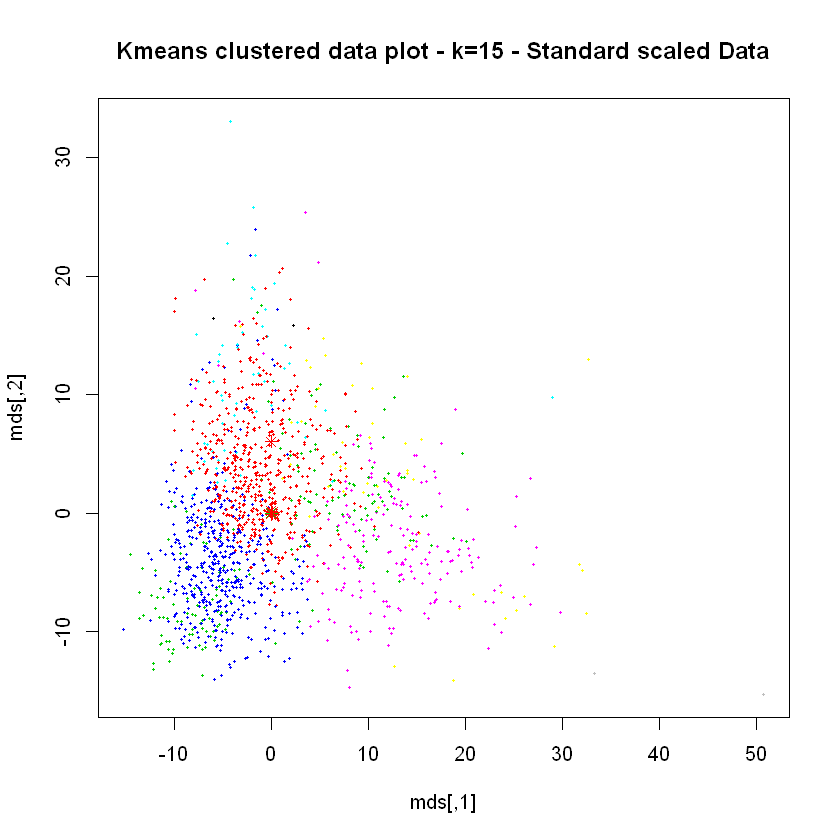

In [41]:
# Run kmeans with 15 clusters on the Standard scaled dataset
cl <- kmeans(df_tfidf[-1], 15)
cl$size
plot(mds, col=cl$cluster, pch = 20, cex = 0.5, main="Kmeans clustered data plot - k=15 - Standard scaled Data")
points(cl$centers, col = cl$cluster, pch = 8, cex = 1)

For cluster size of 10 and 15, the kmeans solution does not look that great as some of the clusters have cluster size of 1. This supports our guess of the optimal cluster size for this dataset as 3.

To figure out the optimal number of clusters that this dataset (standard scaled) can have, we used two approaches -
* using average silhouette width (silhouette method)
* using total within sum of square (also called elbow mothod)

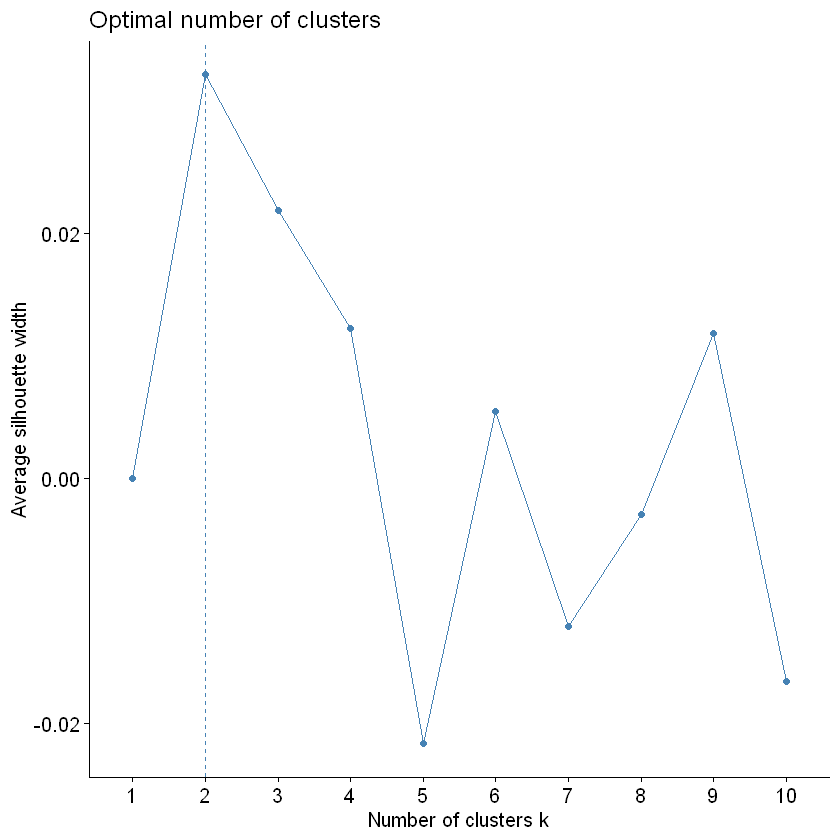

In [42]:
# silhouette method for kmeans
fviz_nbclust(df_tfidf[-1], FUNcluster= kmeans, method = "silhouette") 

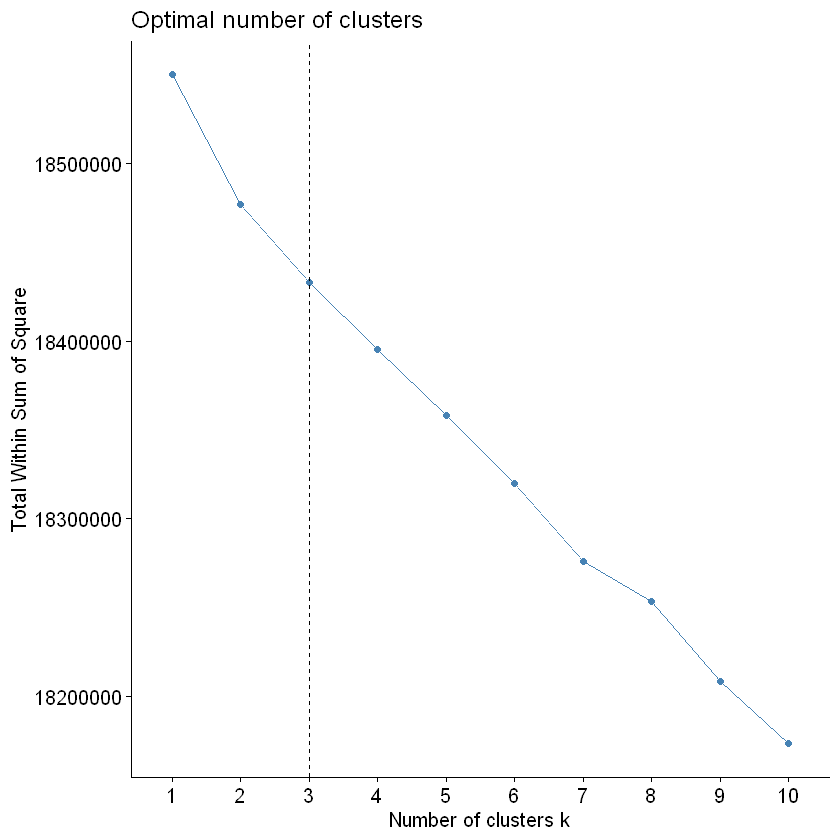

In [43]:
# Elbow method for kmeans
fviz_nbclust(df_tfidf[-1], kmeans, method = "wss") +
geom_vline(xintercept = 3, linetype = 2)

The above two graphs shows that the optimal number of clusters for the standard scaled dataset is 2 (using silhouette method) and 3 (using elbow method). 

### Min Max Scaled Data - values in the range of [0,1]

In [44]:
# Min Max scaled data
# Restore the original tfidf dataset
df_tfidf <- readRDS(file = "tfidf.rds")

df_tfidf[-1] <- lapply(df_tfidf[-1], min_max_scaled)
dim(df_tfidf)

[1]  1500 12376

In [45]:
# After MinMax scale conversion, verify if the min and maximum value for every feature is between [0,1]
# For each feature i.e. tfidf values of every word, get the maximum value
max_tfidf_value_for_each_word <- apply(df_tfidf[-1], MARGIN=2, max)

# For each feature i.e. tfidf values of every word, get the minimum value
min_tfidf_value_for_each_word <- apply(df_tfidf[-1], MARGIN=2, min)

# Print the summary of the maximum value of each feature (max tfidf value for every word)
summary(max_tfidf_value_for_each_word)

# Print the summary of the minimum value of each feature (min tfidf value for every word)
summary(min_tfidf_value_for_each_word)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

Above output shows that the min max scaling worked perfectly. All the features have the minimum value of 0 and maximum value of 1.

In [46]:
# Retrieve 2 principle components
mds <- cmdscale(dist(df_tfidf[-1]), k=2)
summary(mds)

       V1                 V2         
 Min.   :-1.53809   Min.   :-0.9383  
 1st Qu.:-0.43130   1st Qu.:-0.4631  
 Median :-0.06057   Median :-0.2291  
 Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.39948   3rd Qu.: 0.5261  
 Max.   : 1.87215   Max.   : 1.4233  

[1] 270 215 417 397 201

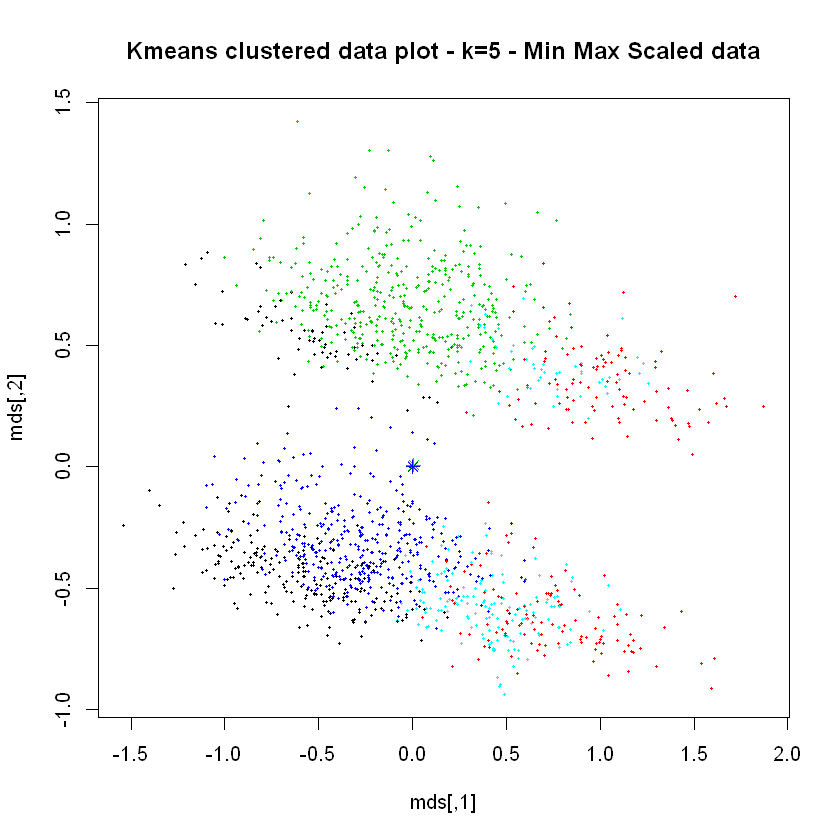

In [47]:
# Run kmeans with 5 clusters on the Min Max Scaled dataset
cl <- kmeans(df_tfidf[-1], 5)
cl$size
plot(mds, col=cl$cluster, pch = 20, cex = 0.5, main="Kmeans clustered data plot - k=5 - Min Max Scaled data")
points(cl$centers, col = cl$cluster, pch = 8, cex = 1)

kmeans (k=5) cluster size for min max scaled data is 270, 215, 417, 397 and 201. Here all the clusters have good amount of observations and this appears to be the best solution of all the above kmeans results. It will be interesting to see the optimal number of clusters in this case.

[1] 165 155  51  12  41   1  82 379 291 323

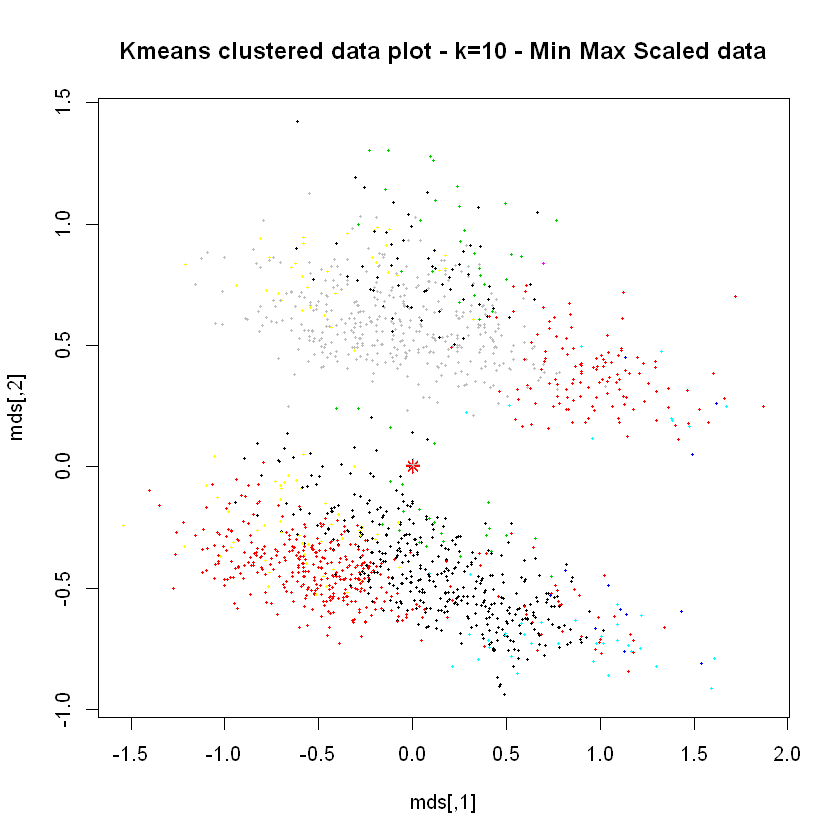

In [48]:
# Run kmeans with 10 clusters on the Min Max Scaled dataset
cl <- kmeans(df_tfidf[-1], 10)
cl$size
plot(mds, col=cl$cluster, pch = 20, cex = 0.5, main="Kmeans clustered data plot - k=10 - Min Max Scaled data")
points(cl$centers, col = cl$cluster, pch = 8, cex = 1)

[1]  17  60 100   1 309   3  67   1   4 152  92 199 350 124  21

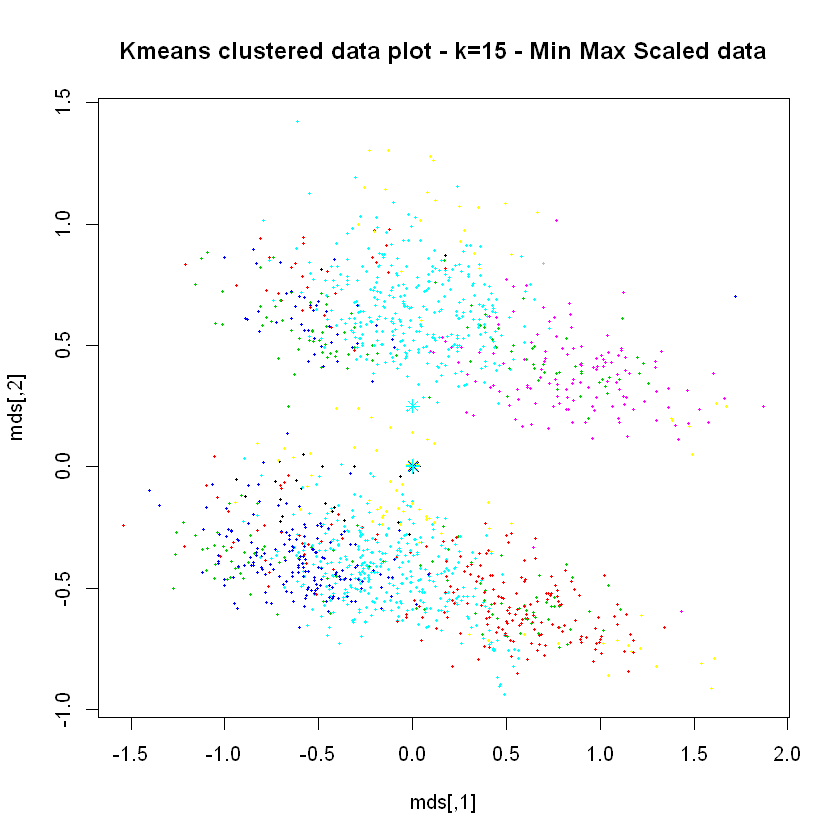

In [49]:
# Run kmeans with 15 clusters on the Min Max Scaled dataset
cl <- kmeans(df_tfidf[-1], 15)
cl$size
plot(mds, col=cl$cluster, pch = 20, cex = 0.5, main="Kmeans clustered data plot - k=15 - Min Max Scaled data")
points(cl$centers, col = cl$cluster, pch = 8, cex = 1)

For cluster size of 10 and 15, the kmeans solution does not look that great as some of the clusters have cluster size of 1. It appears that the optimal cluster size for this dataset should be around 5 but definately less then 10.

To figure out the optimal number of clusters that this dataset (standard scaled) can have, we used two approaches -
* using average silhouette width (silhouette method)
* using total within sum of square (also called elbow mothod)

Warning message:
"did not converge in 10 iterations"

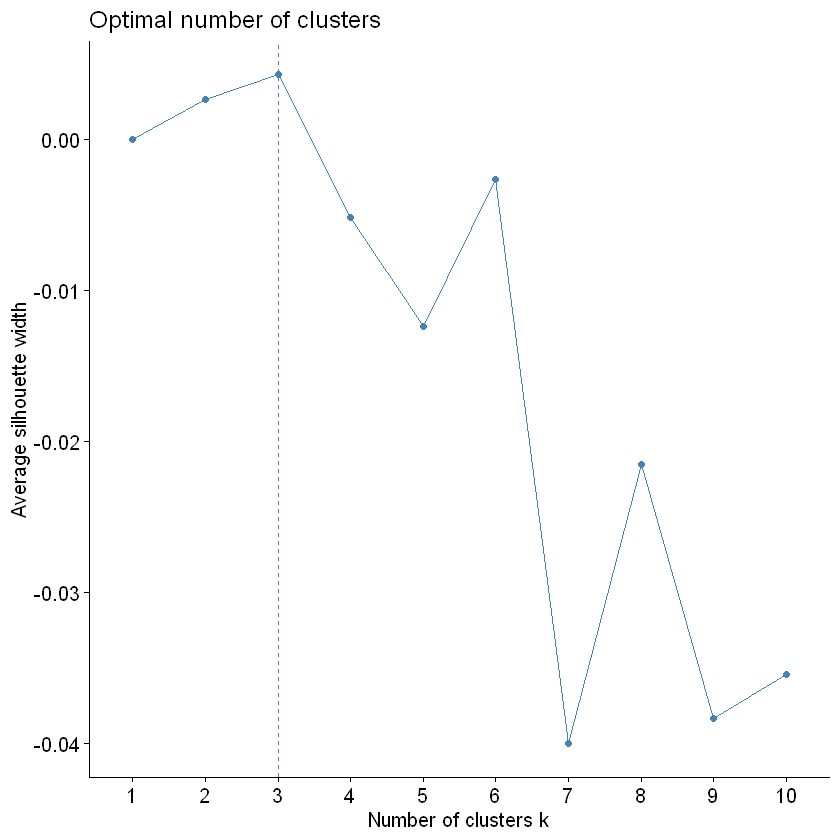

In [50]:
# silhouette method for kmeans
fviz_nbclust(df_tfidf[-1], FUNcluster= kmeans, method = "silhouette") 

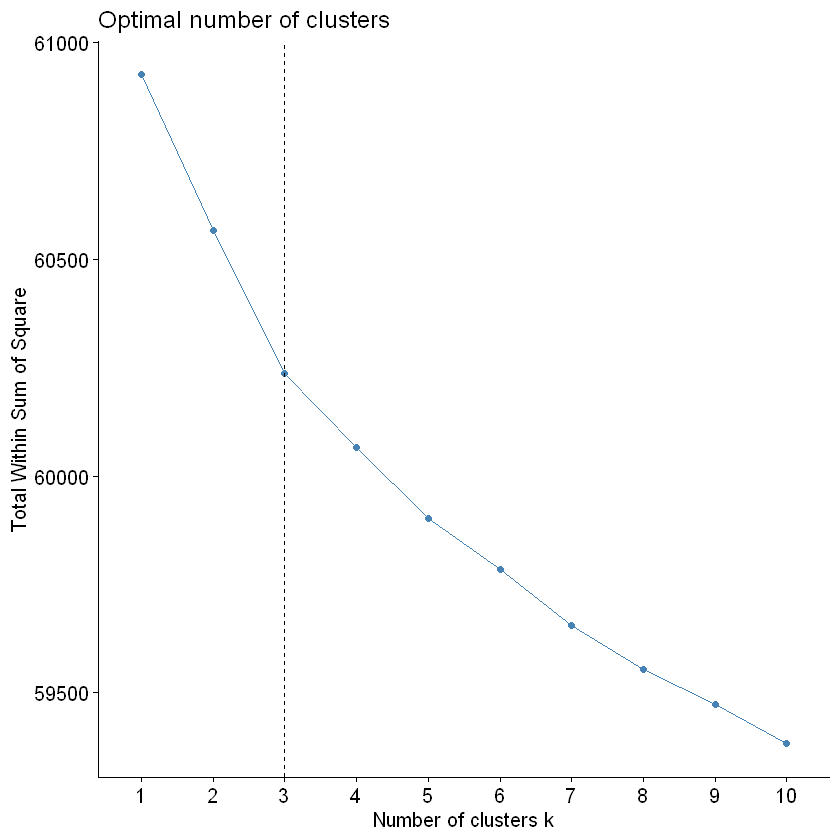

In [51]:
# Elbow method for kmeans
fviz_nbclust(df_tfidf[-1], kmeans, method = "wss") +
geom_vline(xintercept = 3, linetype = 2)

The above two graphs shows that the optimal number of clusters for the standard scaled dataset is 3 (using both  silhouette method and elbow method). 

### Max Abs Scaled Data - values in the range of [-1, 1]

In [51]:
# Max Abs scaled data
# Restore the original tfidf dataset
df_tfidf <- readRDS(file = "tfidf.rds")

df_tfidf[-1] <- lapply(df_tfidf[-1], max_abs_scaled)
dim(df_tfidf)

[1]  1500 12376

In [52]:
# After MaxAbs scale conversion, verify if the min and maximum value for every feature is between [-1,1]
# For each feature i.e. tfidf values of every word, get the maximum value
max_tfidf_value_for_each_word <- apply(df_tfidf[-1], MARGIN=2, max)

# For each feature i.e. tfidf values of every word, get the minimum value
min_tfidf_value_for_each_word <- apply(df_tfidf[-1], MARGIN=2, min)

# Print the summary of the maximum value of each feature (max tfidf value for every word)
summary(max_tfidf_value_for_each_word)

# Print the summary of the minimum value of each feature (min tfidf value for every word)
summary(min_tfidf_value_for_each_word)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

Since the dataset has only positive values, the minimum value is 0. It does not go in the negative side.
So in this case, the result should be similar to the results of MinMax scaled data. To verify this, just run the kmeans with k=5 and compare it with the output of the MinMax scaled data.

In [54]:
# Retrieve 2 principle components
mds <- cmdscale(dist(df_tfidf[-1]), k=2)
summary(mds)

       V1                 V2         
 Min.   :-1.53809   Min.   :-0.9383  
 1st Qu.:-0.43130   1st Qu.:-0.4631  
 Median :-0.06057   Median :-0.2291  
 Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.39948   3rd Qu.: 0.5261  
 Max.   : 1.87215   Max.   : 1.4233  

[1] 270 215 417 397 201

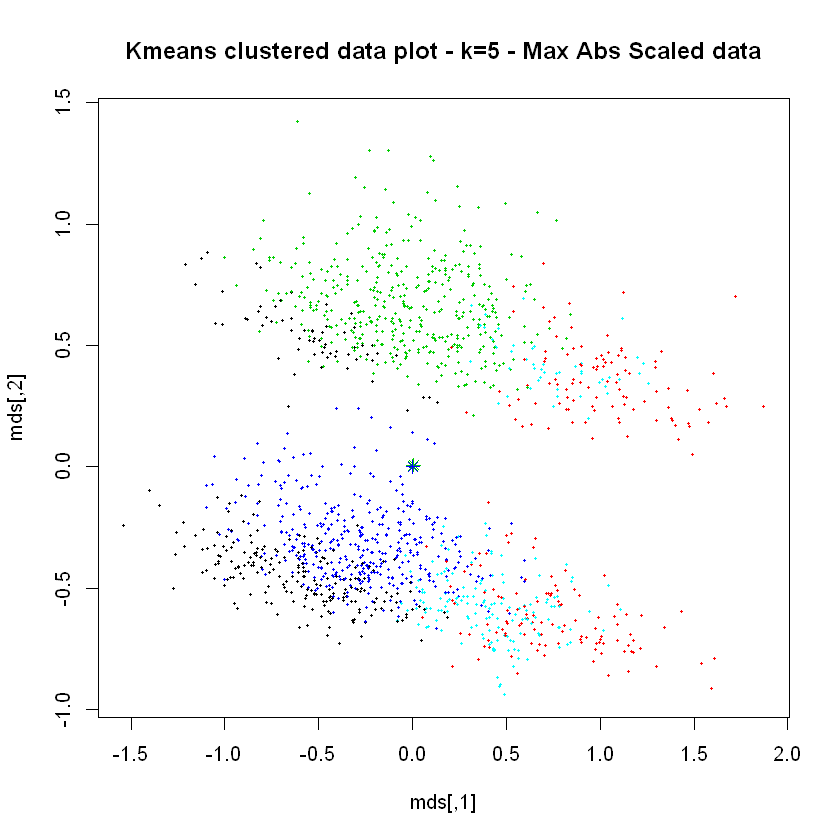

In [55]:
# Run kmeans with 5 clusters on the Max Abs Scaled dataset
cl <- kmeans(df_tfidf[-1], 5)
cl$size
plot(mds, col=cl$cluster, pch = 20, cex = 0.5, main="Kmeans clustered data plot - k=5 - Max Abs Scaled data")
points(cl$centers, col = cl$cluster, pch = 8, cex = 1)

kmeans (k=5) cluster size for max abs scaled data is 270, 215, 417, 397 and 201 which is exactly same as the output of the kmeans for min max scaled data. So we decided not to perform kmeans for k=(10, 15) in this case.

### Solution question 3: Run DBScan <a id='Solution_question_3'></a>

In [56]:
library(dbscan)
help(dbscan)

**What is the eps?** <br>Eps is the “size of the epsilon neighborhood” as defined by the R documentation.  Defining the eps is establishing the maximum distance between two points in order for them to be within the same cluster (its equivalent to the radius of the cluster area).

**What is the meaning of cluster 0?**<br>Cluster 0 contains noise or outlier observations when DBScan is returned in R.  The reason for the observations to be an outlier or noise point is because they do not meet the requirements of the parameters set when running the dbscan() function i.e. the points which are not able to within eps range of identified clusters and is not close enough with minimum points specified by the parameter MinPts so that they can form a new cluster. 

In [57]:
# Restore the original tfidf dataset
df_tfidf <- readRDS(file = "tfidf.rds")

In [58]:
res <- dbscan(df_tfidf[-1], eps = .5, minPts = 5)
res

DBSCAN clustering for 1500 objects.
Parameters: eps = 0.5, minPts = 5
The clustering contains 1 cluster(s) and 1490 noise points.

   0    1 
1490   10 

Available fields: cluster, eps, minPts

In [64]:
res <- dbscan(df_tfidf[-1], eps = 1, minPts = 5)
res

DBSCAN clustering for 1500 objects.
Parameters: eps = 1, minPts = 5
The clustering contains 1 cluster(s) and 1459 noise points.

   0    1 
1459   41 

Available fields: cluster, eps, minPts

In [65]:
res <- dbscan(df_tfidf[-1], eps = 2, minPts = 5)
res

DBSCAN clustering for 1500 objects.
Parameters: eps = 2, minPts = 5
The clustering contains 1 cluster(s) and 1132 noise points.

   0    1 
1132  368 

Available fields: cluster, eps, minPts

In [66]:
res <- dbscan(df_tfidf[-1], eps = 5, minPts = 5)
res

DBSCAN clustering for 1500 objects.
Parameters: eps = 5, minPts = 5
The clustering contains 1 cluster(s) and 565 noise points.

  0   1 
565 935 

Available fields: cluster, eps, minPts

In [67]:
res <- dbscan(df_tfidf[-1], eps = 5, minPts = 3)
res

DBSCAN clustering for 1500 objects.
Parameters: eps = 5, minPts = 3
The clustering contains 1 cluster(s) and 565 noise points.

  0   1 
565 935 

Available fields: cluster, eps, minPts

In [68]:
res <- dbscan(df_tfidf[-1], eps = 10, minPts = 5)
res

DBSCAN clustering for 1500 objects.
Parameters: eps = 10, minPts = 5
The clustering contains 1 cluster(s) and 332 noise points.

   0    1 
 332 1168 

Available fields: cluster, eps, minPts

In [69]:
# Min Max scaled data
df_tfidf[-1] <- lapply(df_tfidf[-1], min_max_scaled)

In [70]:
res <- dbscan(df_tfidf[-1], eps = .5, minPts = 5)
res

DBSCAN clustering for 1500 objects.
Parameters: eps = 0.5, minPts = 5
The clustering contains 1 cluster(s) and 1492 noise points.

   0    1 
1492    8 

Available fields: cluster, eps, minPts

In [71]:
res <- dbscan(df_tfidf[-1], eps = 1, minPts = 5)
res

DBSCAN clustering for 1500 objects.
Parameters: eps = 1, minPts = 5
The clustering contains 1 cluster(s) and 1491 noise points.

   0    1 
1491    9 

Available fields: cluster, eps, minPts

In [72]:
res <- dbscan(df_tfidf[-1], eps = 2, minPts = 5)
res

DBSCAN clustering for 1500 objects.
Parameters: eps = 2, minPts = 5
The clustering contains 1 cluster(s) and 1490 noise points.

   0    1 
1490   10 

Available fields: cluster, eps, minPts

In [73]:
res <- dbscan(df_tfidf[-1], eps = 5, minPts = 5)
res

DBSCAN clustering for 1500 objects.
Parameters: eps = 5, minPts = 5
The clustering contains 1 cluster(s) and 1423 noise points.

   0    1 
1423   77 

Available fields: cluster, eps, minPts

In [74]:
res <- dbscan(df_tfidf[-1], eps = 5, minPts = 3)
res

DBSCAN clustering for 1500 objects.
Parameters: eps = 5, minPts = 3
The clustering contains 1 cluster(s) and 1423 noise points.

   0    1 
1423   77 

Available fields: cluster, eps, minPts

In [75]:
res <- dbscan(df_tfidf[-1], eps = 10, minPts = 5)
res

DBSCAN clustering for 1500 objects.
Parameters: eps = 10, minPts = 5
The clustering contains 1 cluster(s) and 1 noise points.

   0    1 
   1 1499 

Available fields: cluster, eps, minPts

In [76]:
# Instead of using kd-tree to determine the cluster size, try to use other methods
obj_frnn <- frNN(df_tfidf[-1], eps = 1, search='linear')
res <- dbscan(obj_frnn, minPts = 5)
res

DBSCAN clustering for 1500 objects.
Parameters: eps = 1, minPts = 5
The clustering contains 1 cluster(s) and 1491 noise points.

   0    1 
1491    9 

Available fields: cluster, eps, minPts

In [77]:
obj_frnn <- frNN(df_tfidf[-1], approx=2, eps = 3, search='linear')
res <- dbscan(obj_frnn, minPts = 5)
res

DBSCAN clustering for 1500 objects.
Parameters: eps = 3, minPts = 5
The clustering contains 1 cluster(s) and 1486 noise points.

   0    1 
1486   14 

Available fields: cluster, eps, minPts

In [78]:
obj_frnn <- frNN(df_tfidf[-1], approx=2, eps = 3, search='linear', bucketSize=5)
res <- dbscan(obj_frnn, minPts = 5)
res

DBSCAN clustering for 1500 objects.
Parameters: eps = 3, minPts = 5
The clustering contains 1 cluster(s) and 1486 noise points.

   0    1 
1486   14 

Available fields: cluster, eps, minPts

In [79]:
df_tfidf[-1] <- scale(df_tfidf[-1])
obj_frnn <- frNN(df_tfidf[-1], approx=2, eps = 3, search='linear', bucketSize=5)
res <- dbscan(obj_frnn, minPts = 5)
res

DBSCAN clustering for 1500 objects.
Parameters: eps = 3, minPts = 5
The clustering contains 1 cluster(s) and 1493 noise points.

   0    1 
1493    7 

Available fields: cluster, eps, minPts

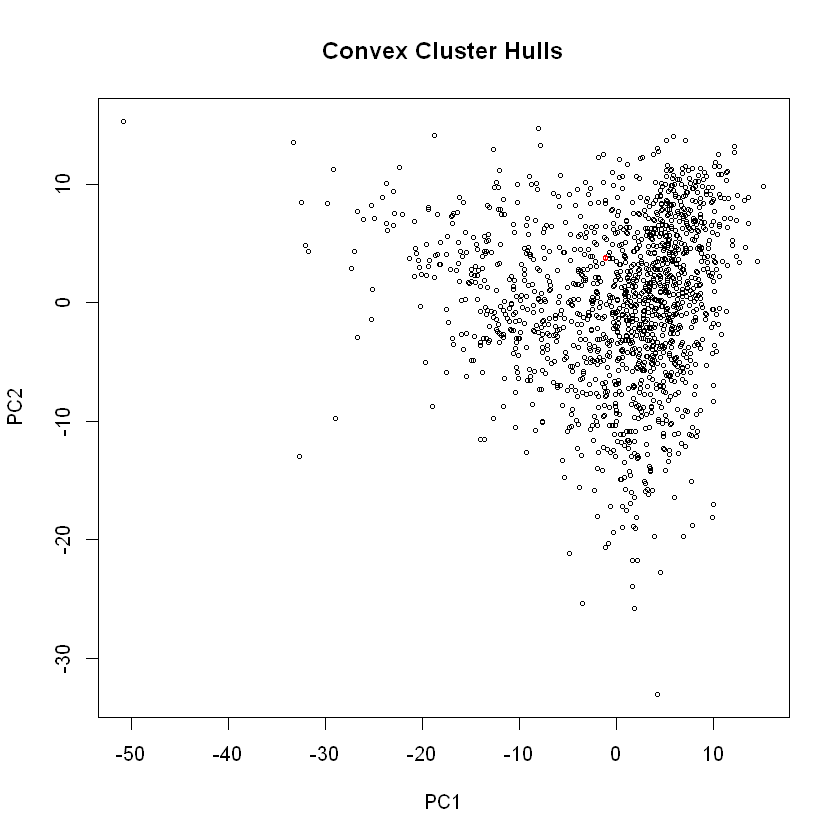

In [80]:
hullplot(df_tfidf[-1], res)

hullplot produces a two-dimensional scatter plot with added convex hulls for clusters giving us some visual representation of the clustered data. Since our dataset is multidimensional, it by deflaut computed the first 2 principle components and plot them to reduce the dimension to 2. It looks like if we increase the eps size then it may give us a better result.

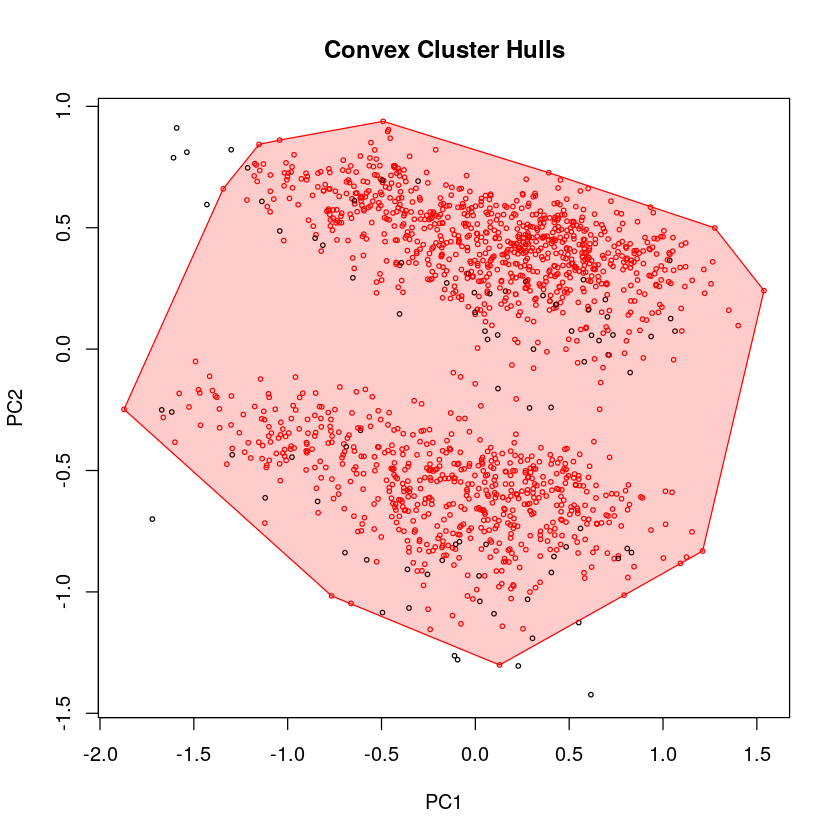

In [81]:
res <- dbscan(df_tfidf[-1], eps = 8, minPts = 3)
hullplot(df_tfidf[-1], res)

We are still not able to get a more than 1 cluster from the dataset. DBScan to Standard Scaled Dataset. 

In [82]:
# Restore the original tfidf dataset
df_tfidf <- readRDS(file = "tfidf.rds")
# Min Max scaled data
df_tfidf[-1] <- scale(df_tfidf[-1])

DBSCAN clustering for 1500 objects.
Parameters: eps = 20, minPts = 10
The clustering contains 0 cluster(s) and 1500 noise points.

   0 
1500 

Available fields: cluster, eps, minPts

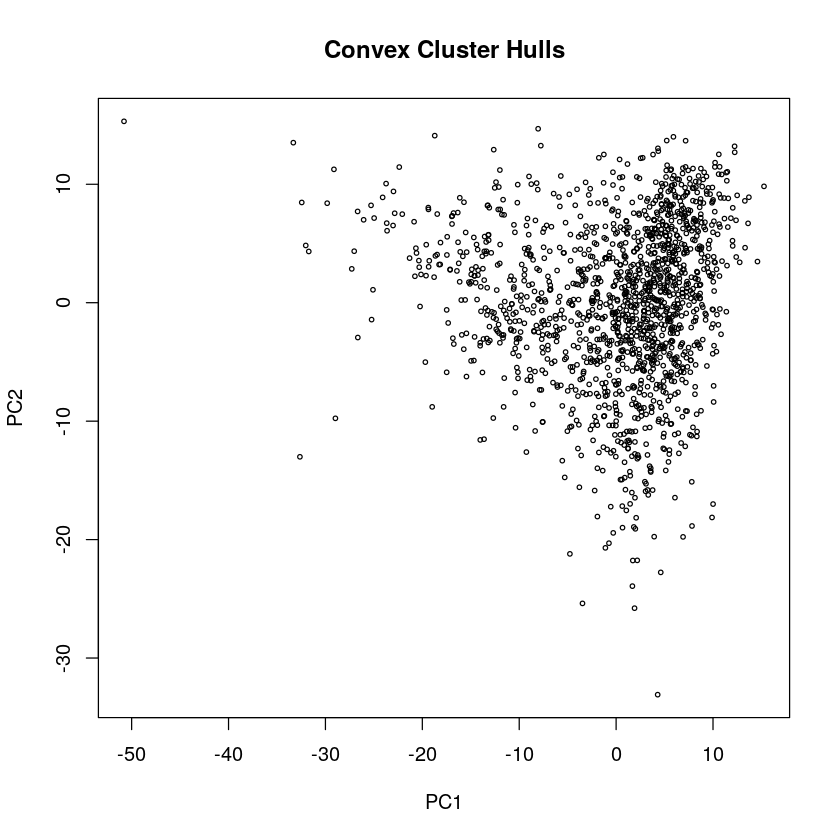

In [83]:
res <- dbscan(df_tfidf[-1], eps = 20, minPts = 10)
res
hullplot(df_tfidf[-1], res)

DBSCAN clustering for 1500 objects.
Parameters: eps = 50, minPts = 10
The clustering contains 1 cluster(s) and 1487 noise points.

   0    1 
1487   13 

Available fields: cluster, eps, minPts

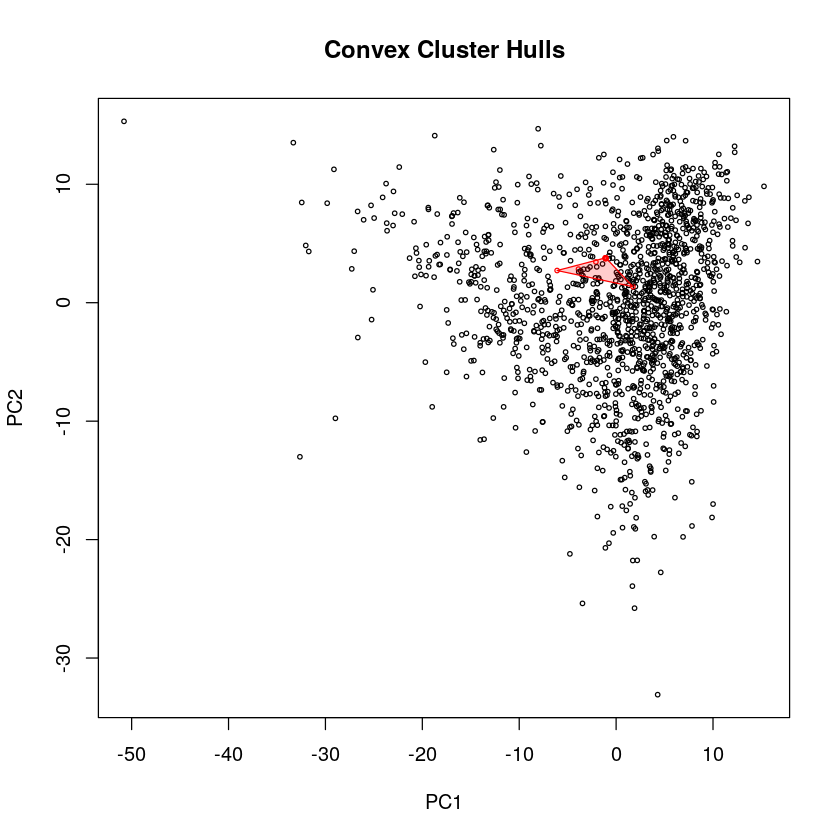

In [84]:
res <- dbscan(df_tfidf[-1], eps = 50, minPts = 10)
res
hullplot(df_tfidf[-1], res)

**How are the results different from your kmeans?**<br>
Kmeans required the number of clusters beforehand and the output of kmeans contained the details of the clustering information returned by the kmeans like the cluster size, cluster centers and the cluster for each data point.<br>
Whereas DBScan does not require the number of clusters. It looks into the dataset and try to find the number of clusters that are present in the dataset. It gives the cluster information for each point. And if in case its not able to fit any point to any of the clusters, then it returns it as a noise point (cluster 0).

### Solution question 4: When would you use kmeans vs. DBScan  <a id='Solution_question_4'></a>

Kmeans algorithm is a good choice for datasets that have a small number of clusters with proportional sizes and linearly separable data. It can scale up to use the algorithm on very large datasets as well. Kmeans is applied to solve big-data problems as it’s simple to use, effective, and highly scalable. Kmeans algorithm are used as a key component of many commercial predictive analytics packages.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) does not require any user-defined initialization parameters to create any instance, and can override the default parameters during initialization if needed. But if you’re using the default parameters, the algorithm cannot provide a close match to the desired outcome. DBSCAN is better suited for datasets that have disproportional cluster sizes, and where data can be separated in a non-linear manner. Like K-means, DBSCAN is scalable, but using it on very large datasets requires more memory and computing power.

Kmeans works better on sparse data sets like the one we are using. DBSCAN does not handle noise or outliers of a sparse data set very well. So for the given dataset, the preference would be to use kmeans as though kmeans require the number of clusters to be known beforehand, we have showed ways using which we can determine the optimal cluster size to which the given dataset can be classified to and this ability overcomes the most significant importance of DBScan which does not require the number of clusters to be known beforehand.

### Solution question 5: WorkCloud <a id='Solution_question_5'></a>

In [85]:
# Min Max scaled data
# Since the most promising results of kmeans were using the min max scaling of the dataset, 
#   use it to determine the word count.
# Restore the original tfidf dataset
df_tfidf <- readRDS(file = "tfidf.rds")

df_tfidf[-1] <- lapply(df_tfidf[-1], min_max_scaled)
dim(df_tfidf)

[1]  1500 12376

In [86]:
# Run kmeans with 10 clusters on the Min Max Scaled dataset
cl <- kmeans(df_tfidf[-1], 10)
cl$size

[1] 277  67  94  96  71 261 111 353 129  41

In [87]:
# Add the predicted cluster number to the end of the dataset
df_tfidf['cluster'] <- cl$cluster
dim(df_tfidf)

[1]  1500 12377

In [88]:
head(df_word_data)

doc,word_num,count
1,2,1
1,39,1
1,42,3
1,77,1
1,95,1
1,96,1


In [89]:
head(df_tfidf %>% select(doc, cluster))

doc,cluster
1,8
2,6
3,8
4,6
5,8
6,5


In [90]:
# Add cluster number to the df_word_data dataframe by merging df_word_data with df_tfidf
df_word_data <- merge(x = df_word_data, y = df_tfidf %>% select(doc, cluster), by = "doc", all = TRUE)
tail(df_word_data)

,doc,word_num,count,cluster
746311,1500,12364,1,1
746312,1500,12382,1,1
746313,1500,12388,3,1
746314,1500,12390,1,1
746315,1500,12393,1,1
746316,1500,12414,1,1


In [91]:
head(df_vocab_data)

word,word_num
a2i,1
aaa,2
aaai,3
aapo,4
aat,5
aazhang,6


In [92]:
# Add the actual word to the df_word_data dataframe by merging df_word_data with df_vocab_data
# Since not all the words in the vocab data are part of the df_word_data dataframe, perform left join
df_word_data <- merge(x = df_word_data, y = df_vocab_data, by = "word_num", all.x = TRUE)
tail(df_word_data)

,word_num,doc,count,cluster,word
746311,12418,153,1,5,zurich
746312,12418,133,1,5,zurich
746313,12418,368,1,5,zurich
746314,12418,405,1,1,zurich
746315,12418,658,1,5,zurich
746316,12419,68,15,3,zwislocki


In [93]:
df_word_cloud <- df_word_data %>% select(cluster, word, count) %>% # Select cluster, word, count columns
        group_by(cluster, word) %>%  # Group the data by cluster and then word
            summarise(total = sum(count)) %>% # computer the sum of count for every word in each cluster, name column as total
                arrange(desc(total)) %>% # Sort by dataset by column total
                    group_by(cluster) %>% # Group the dataset by cluster
                        slice(1:20) # get top 20 words by total for every cluster 

In [94]:
head(df_word_cloud)

cluster,word,total
1,network,5633
1,function,5447
1,model,5436
1,learning,5002
1,algorithm,4800
1,set,3805


Loading required package: RColorBrewer


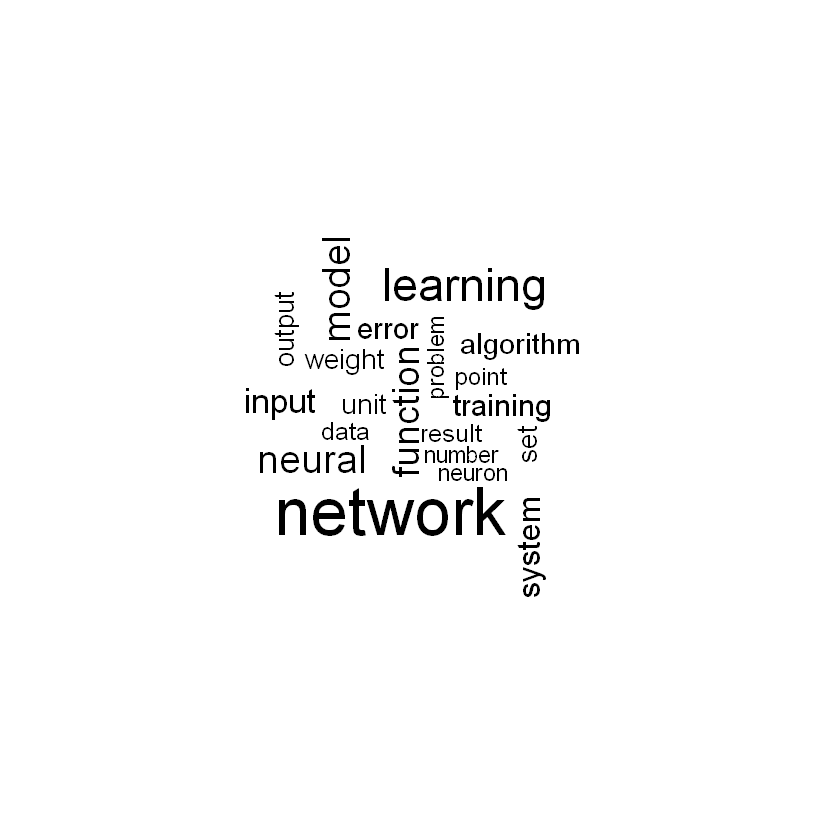

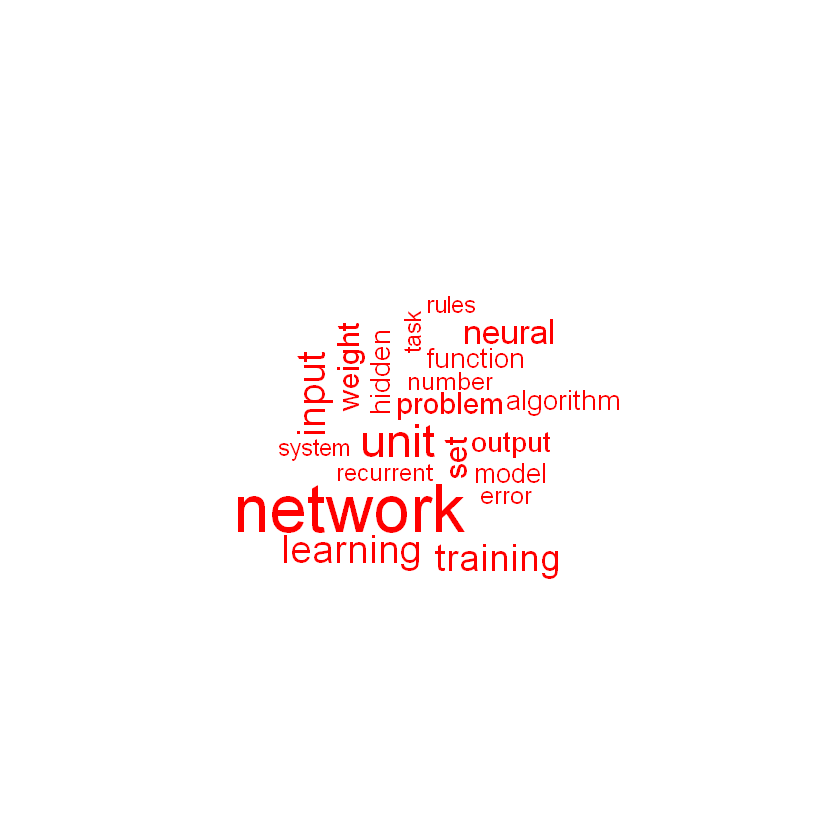

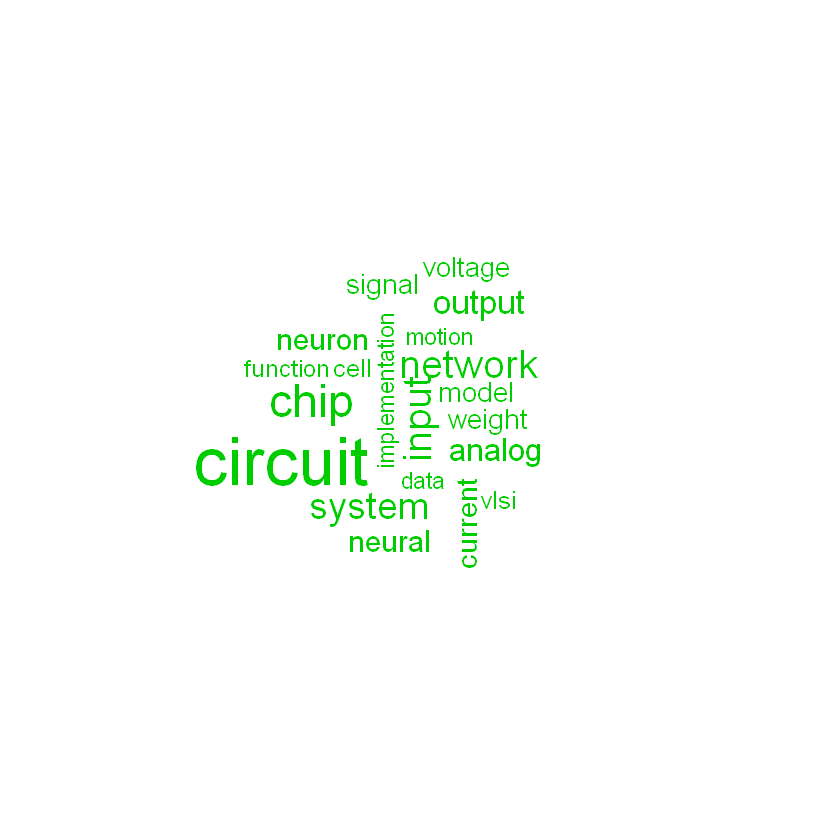

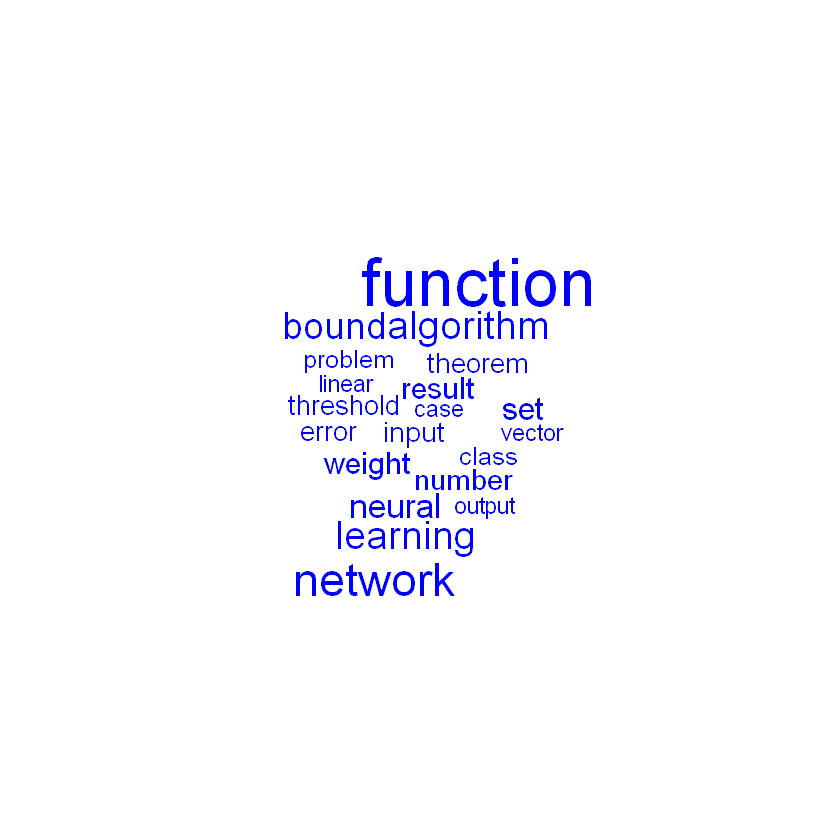

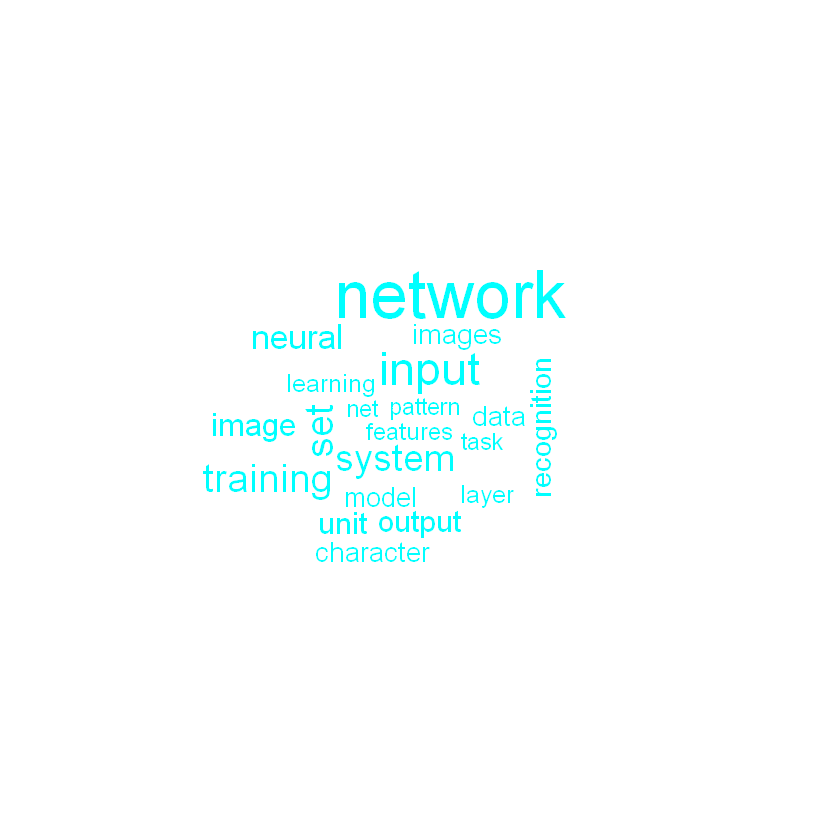

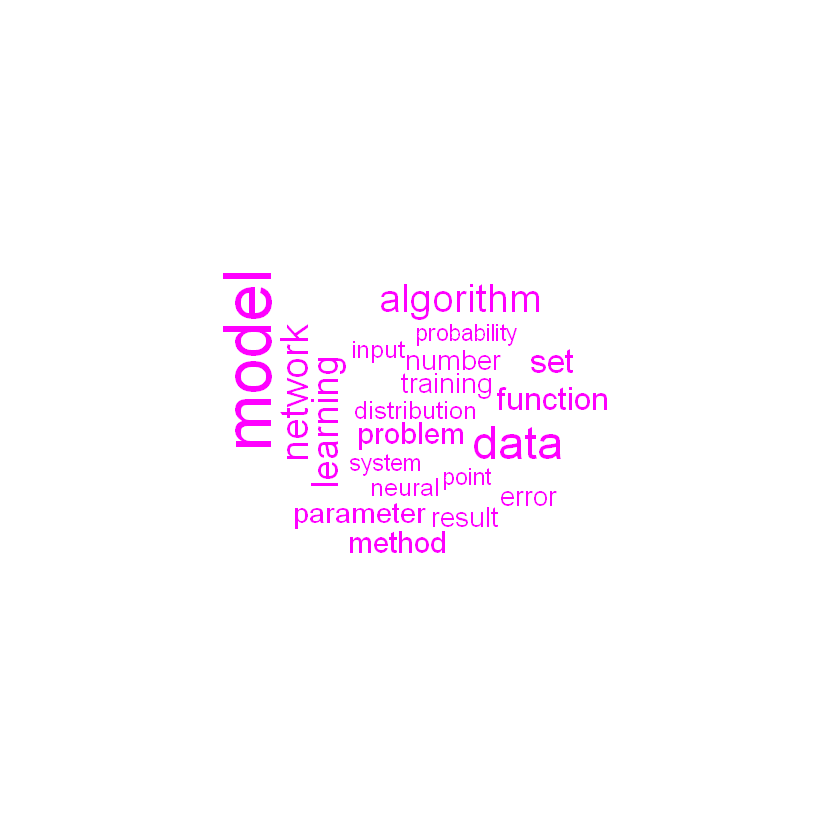

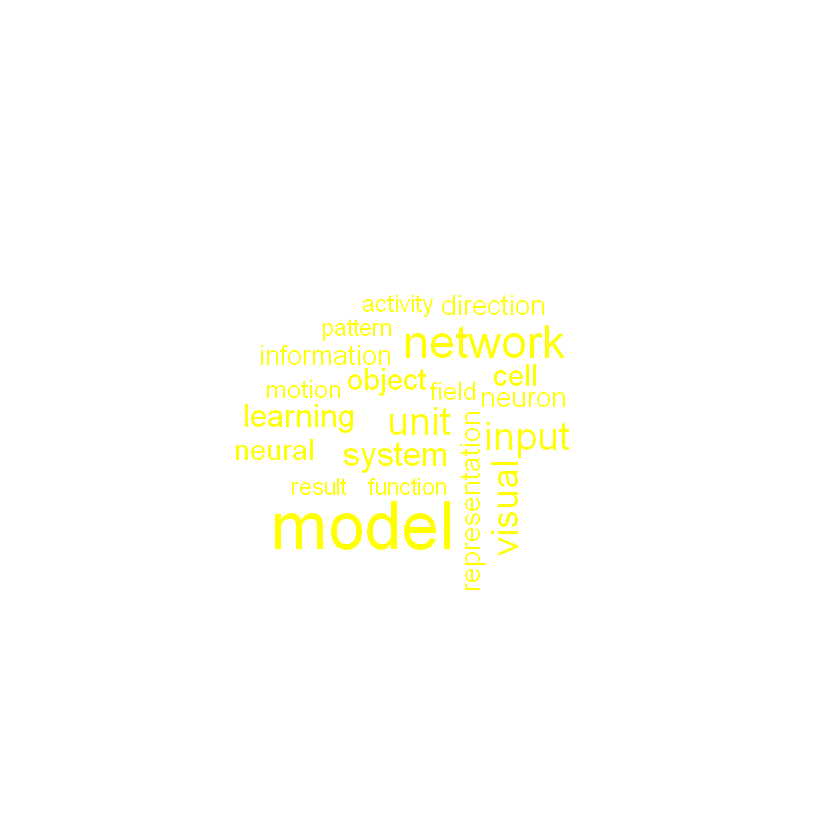

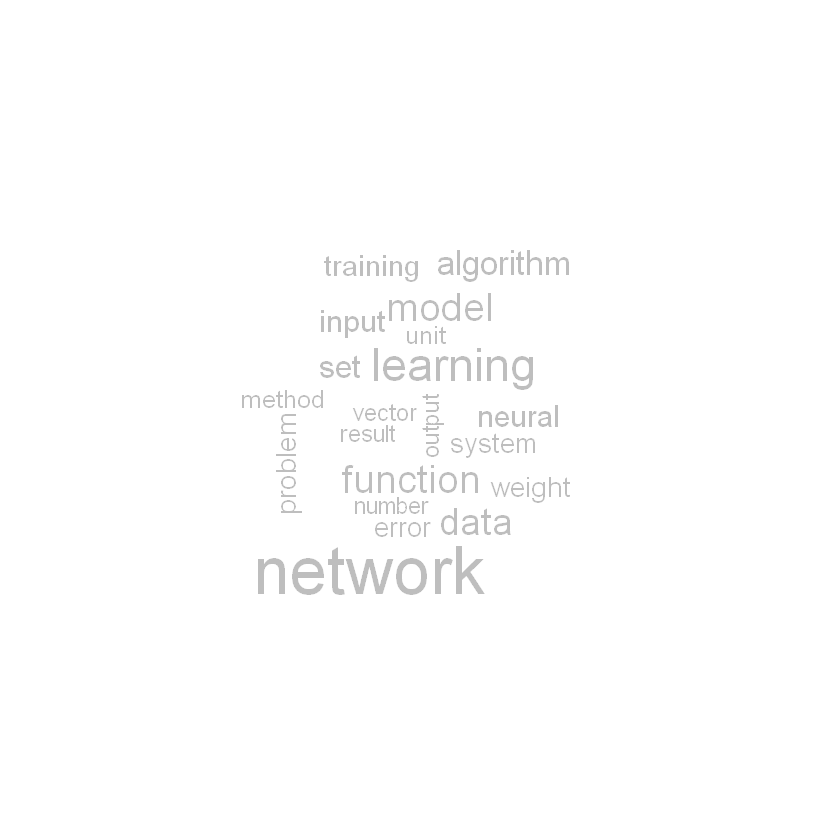

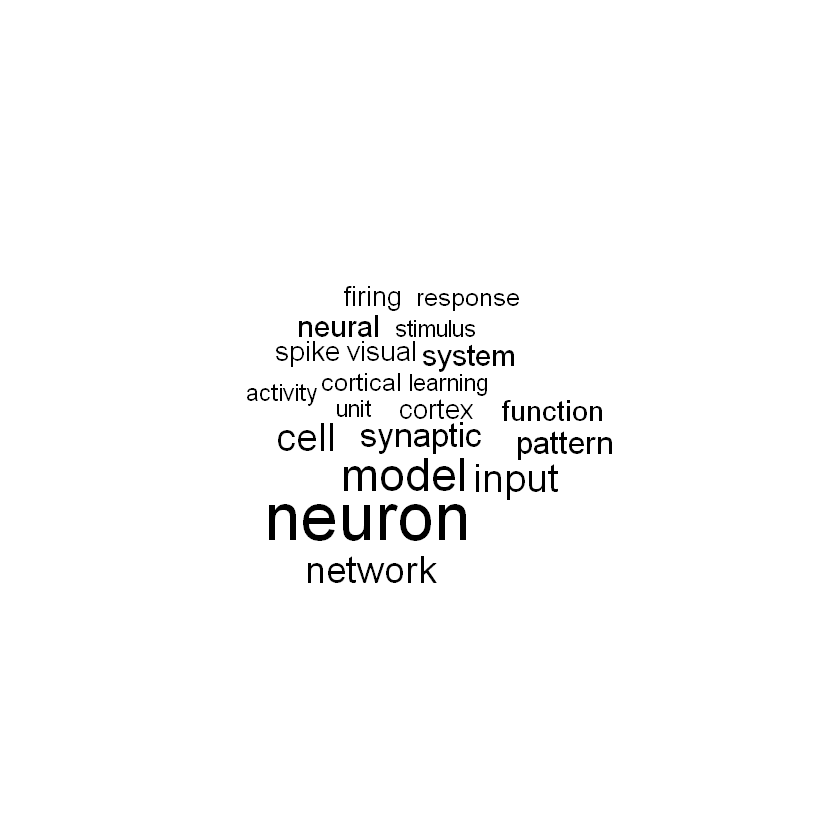

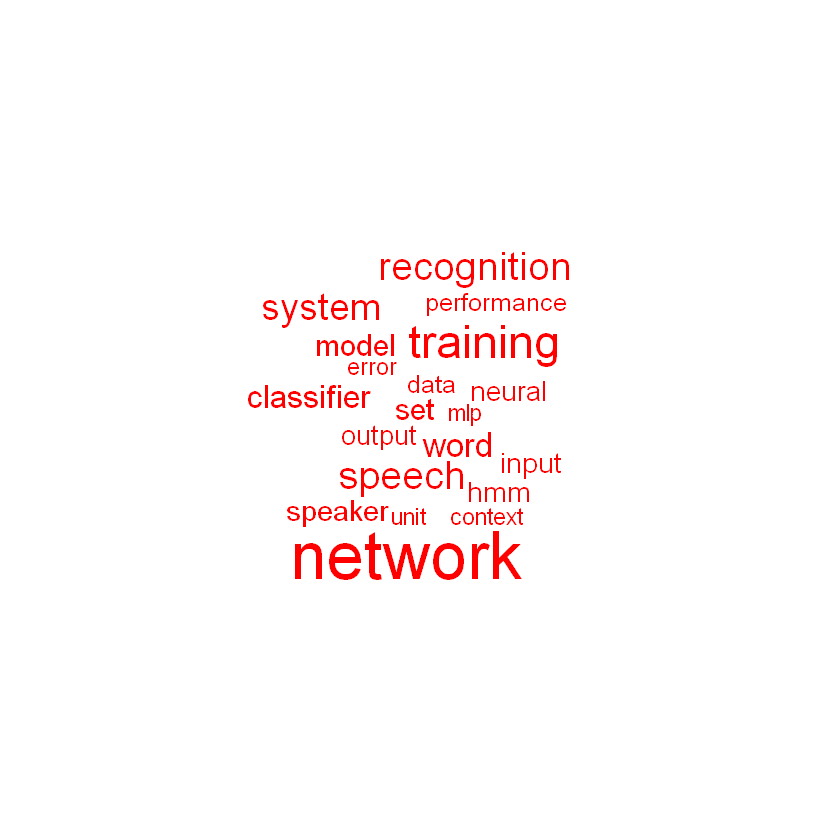

In [95]:
# Create wordcloud for every cluster showing the 10 most frequent words in that cluster 
library(wordcloud)
for(i in 1:10){
    wordcloud(df_word_cloud[df_word_cloud$cluster==i, ]$word, df_word_cloud$total, colors = i)
}

In [96]:
word_cloud <- as.data.frame(df_word_cloud[df_word_cloud$cluster==1,]$word)
colnames(word_cloud) <- 'cluster_1'
for(i in 2:10){
   word_cloud[paste('cluster_', i)] <- df_word_cloud[df_word_cloud$cluster==i,]$word
}
word_cloud

cluster_1,cluster_ 2,cluster_ 3,cluster_ 4,cluster_ 5,cluster_ 6,cluster_ 7,cluster_ 8,cluster_ 9,cluster_ 10
network,network,circuit,function,network,model,model,network,neuron,network
learning,unit,chip,network,input,data,network,learning,model,training
model,learning,network,algorithm,set,network,input,model,cell,speech
neural,input,input,learning,training,algorithm,unit,function,input,recognition
function,training,system,bound,system,learning,visual,data,network,system
input,neural,output,neural,neural,set,system,algorithm,synaptic,word
system,set,analog,set,image,function,learning,set,pattern,classifier
training,weight,neural,result,output,problem,cell,input,system,set
error,problem,neuron,weight,unit,method,object,neural,neural,model
algorithm,output,current,number,recognition,parameter,neural,training,function,speaker


A guess of what kind of documents may be present in each cluster:<br>
Cluster 1 - General Machine learning<br>
Cluster 2 - Neuron functionality<br>
Cluster 3 - Electronic neural network chips<br>
Cluster 4 - Neural Networks and Machine Learning<br>
Cluster 5 - Image Recognition<br>
Cluster 6 - Neural Networks and Machine Learning<br>
Cluster 7 - Video Analysis<br>
Cluster 8 - Neural Networks and Machine Learning<br>
Cluster 9 - Computational Brain Theory<br>
Cluster 10 - Speech Recognition<br>

### Conclusion
TFIDF is used in a number of NLP techniques such as text mining, search queries and summarization. Here in this case study, we computed the tfidf values and then used it to categorize the documents into some logical grouping. The tfidf values were on different scales so multiple scaling algorithms were tried, namely, Log Scaled, Standard Scaling, MinMax Scaling and MaxAbs Scaling. MinMax scaling gave the best results in terms of the size of every cluster. Optimal cluster size for all the different scaled data was computed and everytime, the result was 2 or 3 clusters. For scaled data, it came out to be 3 using both the silhouette method and the elbow method. 
Alternatively, when the same dataset was used with DBScan algorithm, the number of clusters always came out to be 1 for all the combinations of parameters that we provided. That too, most of the data points belonging to cluster 0 i.e. belonging to noise points. 
This difference in results is because both algorithms have differences.<br>
Kmeans aims to partition the points into k groups such that the sum of squares from points to the assigned cluster centres is minimized. At the minimum, all cluster centres are at the mean of their Voronoi sets (the set of data points which are nearest to the cluster centre).<br>
DBSCAN estimates the density around each data point by counting the number of points in a user-specified eps-neighborhood and applies a used-specified minPts thresholds to identify core, border and noise points. In a second step, core points are joined into a cluster if they are density-reachable (i.e., there is a chain of core points where one falls inside the eps-neighborhood of the next). Finally, border points are assigned to clusters.

Kmeans requires the number of clusters into which the data is to be classified to and DBScan gives the number of clusters that this dataset can be classified to.

### References

A. Gelbukh, "Natural language processing," Fifth International Conference on Hybrid Intelligent Systems (HIS'05), Rio de Janeiro, Brazil, 2005, pp. 1 pp.-. doi: 10.1109/ICHIS.2005.79 keywords: {natural languages;artificial intelligence;natural language processing;artificial intelligence research;knowledge representation;logical reasoning;constraint satisfaction;Natural language processing;Artificial intelligence;Knowledge representation;Large-scale systems;Statistical analysis;Machine learning;Data mining;Optimization methods;Genetic algorithms;Neural networks}, URL: http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=1587718&isnumber=33460